## The Core Idea of Regression

At its heart, regression analysis seeks to build a mathematical model that describes the relationship between variables. This allows us to move from simply observing data to predicting an outcome. For example, given data on house sizes and their sale prices, a regression model could learn the relationship and then predict the price of a new house given its size.

To understand regression, it is essential to be familiar with its core terminology:

  * **Response Variable**: This is the variable you are trying to predict. It is also known as the **dependent variable** because its value is expected to depend on other variables.
  * **Explanatory Variables**: These are the variables used to predict the response variable. They are also known as **independent variables** or **features**.

The fundamental goal is to find a function, `f`, such that:

**Response Variable** `≈ f(`**Explanatory Variables**`)`

The model learns this function from a set of data where both the response and explanatory variables are known.

### Types of Regression Models

The type of regression model you use depends primarily on the nature of your response variable.

#### Linear vs. Logistic Regression

  * **Linear Regression**: This is used when the **response variable is numeric** (i.e., continuous). The model predicts a specific quantity.
      * *Examples*: Predicting a person's height, the price of a stock, or the temperature tomorrow.
  * **Logistic Regression**: Despite its name, this is a model for **classification**. It is used when the **response variable is categorical**, typically binary (logical `True`/`False` or two categories like `Yes`/`No`). The model predicts the probability of an observation belonging to a particular class.
      * *Examples*: Predicting whether a customer will churn (`Yes`/`No`), if an email is spam (`Spam`/`Not Spam`), or if a transaction is fraudulent (`True`/`False`).

#### Simple vs. Multiple Regression

This distinction refers to the number of explanatory variables used:

  * **Simple Regression**: The model uses only **one** explanatory variable to predict the response.
  * **Multiple Regression**: The model uses **two or more** explanatory variables.

### Exploring Relationships: Correlation and Visualization

Before building a regression model, a critical first step is to perform exploratory data analysis (EDA) to understand the relationship between your variables.

#### Descriptive Statistics and Correlation

You can get a quick numerical summary using standard methods like `.mean()`. To quantify the linear relationship between two numeric variables, you can calculate the **correlation coefficient**. This value ranges from -1 to +1 and measures the strength and direction of a linear association. A value near +1 indicates a strong positive linear relationship, while a value near -1 indicates a strong negative one.

```python
import pandas as pd
import numpy as np

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'explanatory_var': np.linspace(0, 100, 200),
    'response_var': 50 + 3 * np.linspace(0, 100, 200) + np.random.normal(0, 40, 200)
})

# Calculate descriptive statistics
print(df.mean())

# Calculate the correlation between the two variables
correlation = df['explanatory_var'].corr(df['response_var'])
print(f"Correlation Coefficient: {correlation:.4f}")
```

#### Visualization

A numerical correlation should always be confirmed with a visualization. A scatter plot is the ideal tool for inspecting the relationship between two numeric variables. The `seaborn` library provides powerful and aesthetically pleasing functions for this.

  * `seaborn.scatterplot()`: Renders the raw data points, allowing you to visually assess the pattern, direction, and strength of the relationship.
  * `seaborn.regplot()`: This function goes a step further by combining a scatter plot with a fitted linear regression trend line. It provides an immediate visual summary of the linear model that best fits the data. The `ci=None` argument can be used to hide the confidence interval shading for a cleaner plot.


```python
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot using seaborn objects
sns.scatterplot(data=df, x="explanatory_var", y="response_var", ax=axes[0])
axes[0].set_title("Scatter Plot of Response vs. Explanatory")
axes[0].grid(True, linestyle='--')

# Regression plot using seaborn objects
sns.regplot(data=df, x="explanatory_var", y="response_var", ax=axes[1], 
            ci=None, line_kws={"color": "red"})
axes[1].set_title("Regression Plot with Trend Line")
axes[1].grid(True, linestyle='--')

plt.tight_layout()
plt.show()
```

### Python Packages for Regression

Two main libraries dominate the landscape for performing regression in Python:

  * **`scikit-learn`**: The premier machine learning library in Python. It is optimized for **predictive modeling**, providing a clean, consistent API (`.fit()`, `.predict()`) and a vast suite of tools for model building and evaluation.
  * **`statsmodels`**: A library focused on **statistical inference** and rigorous analysis. It provides highly detailed, R-style summary outputs that include metrics like p-values, standard errors, and confidence intervals for the model coefficients. It is optimized for gaining statistical **insight** into the data and the model's parameters.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Which one is the response variable?
Regression lets you predict the values of a response variable from known values of explanatory variables. Which variable you use as the response variable depends on the question you are trying to answer, but in many datasets, there will be an obvious choice for variables that would be interesting to predict. Over the next few exercises, you'll explore a Taiwan real estate dataset with four variables.

| Variable | Meaning |
|----------|---------|
| `dist_to_mrt_station_m` | Distance to nearest MRT metro station, in meters. |
| `n_convenience` | No. of convenience stores in walking distance. |
| `house_age_years` | The age of the house, in years, in three groups. |
| `price_twd_msq` | House price per unit area, in New Taiwan dollars per meter squared. |

Print `taiwan_real_estate` in the console to view the dataset, and decide which variable would make a good response variable.

In [3]:
taiwan_real_estate = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/5857/datasets/4c29a50214b5b3232b2b99eee35cdde2f588dfac/taiwan_real_estate2.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


### Visualizing two numeric variables
Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

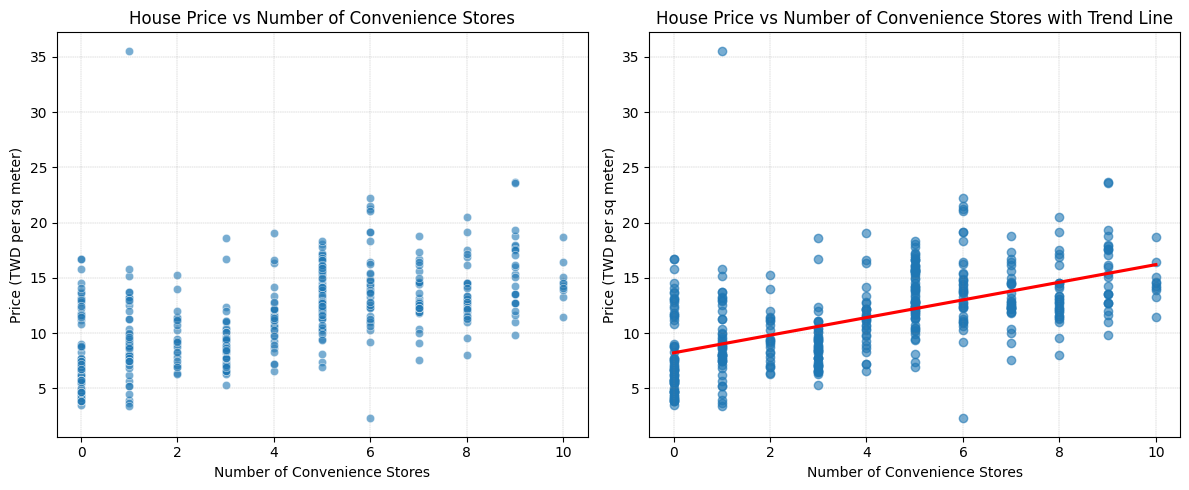

In [4]:
# Using taiwan_real_estate, draw a scatter plot of "price_twd_msq" (y-axis) versus "n_convenience" (x-axis).

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot on the first subplot
sns.scatterplot(
    x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, alpha=0.6, ax=axes[0]
)
axes[0].set(
    xlabel="Number of Convenience Stores",
    ylabel="Price (TWD per sq meter)",
    title="House Price vs Number of Convenience Stores",
)
axes[0].grid(True, alpha=0.6, linestyle="--", linewidth=0.3, color="grey")

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience on the second subplot
sns.regplot(
    x="n_convenience",
    y="price_twd_msq",
    data=taiwan_real_estate,
    ci=None,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6},
    ax=axes[1],
)
axes[1].set(
    xlabel="Number of Convenience Stores",
    ylabel="Price (TWD per sq meter)",
    title="House Price vs Number of Convenience Stores with Trend Line",
)
axes[1].grid(True, alpha=0.6, linestyle="--", linewidth=0.3, color="grey")

plt.tight_layout()
plt.show()

## The Anatomy of a Straight Line

A simple linear regression model is defined by a straight line. The equation for this line has two key parameters that the model must estimate from the data: the **intercept** and the **slope**.

  * **Intercept**: This is the predicted value of the response variable (`y`) when the explanatory variable (`x`) is equal to zero. Geometrically, it is the point where the regression line crosses the vertical y-axis.

  * **Slope**: This represents the predicted change in the response variable (`y`) for a one-unit increase in the explanatory variable (`x`). It quantifies both the direction (positive or negative) and the magnitude of the linear relationship.

These two parameters define the model's equation:

$$\text{response} = \text{intercept} + \text{slope} \times \text{explanatory}$$

The process of "fitting" the model involves finding the specific numerical values for the intercept and slope that create the line that best represents the data, typically by minimizing the residual sum of squares (Ordinary Least Squares).


### Fitting a Model with `statsmodels`

While `scikit-learn` is optimized for prediction, the `statsmodels` library is optimized for statistical inference and providing detailed insights into a model's parameters. It offers a highly readable, formula-based syntax for defining regression models, similar to the syntax used in the R programming language.

#### The Formula Syntax

`statsmodels` uses a formula string to define the relationship between variables. The formula follows the pattern `"response ~ explanatory_1 + explanatory_2 + ..."`. The tilde (`~`) can be read as "is modeled by". For a simple linear regression with one explanatory variable, the formula is simply `"response ~ explanatory"`.

#### The Fitting Process

Fitting a model with `statsmodels.formula.api` is a two-step process:

1.  **Define the model**: You import the `ols` (Ordinary Least Squares) function and pass it the formula string and your DataFrame. This creates a model object but does not perform any calculations yet.
2.  **Fit the model**: You call the `.fit()` method on the model object. This executes the OLS algorithm to find the optimal values for the slope and intercept.


```python
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'explanatory_var': np.linspace(0, 100, 200),
    'response_var': 20 + 3.5 * np.linspace(0, 100, 200) + np.random.normal(0, 40, 200)
})

# 1. Define the model using the formula syntax
# The formula "response_var ~ explanatory_var" specifies the model's structure.
mdl_simple_regression = smf.ols(formula="response_var ~ explanatory_var", data=df)

# 2. Fit the model to the data
results = mdl_simple_regression.fit()

# The fitted parameters (intercept and slope) can be accessed via .params
print(results.params)
```

### Interpreting the Model Coefficients

The `results.params` attribute contains the estimated values for the intercept and the slope(s). These coefficients are the core output of the fitted model and form our predictive equation.

Based on the output from the code above, we might get something like:

```python
Intercept          19.939221
explanatory_var     3.515298
dtype: float64
```

We can now write the final equation for our regression line:

$$\text{response\_var} = 19.94 + 3.52 \times \text{explanatory\_var}$$

The interpretation of these coefficients is as follows:

  * **Intercept (19.94)**: The model predicts that when the `explanatory_var` is **zero**, the `response_var` will have a value of **19.94**. It is crucial to consider whether an explanatory variable of zero is a realistic or meaningful value in your data. If `x=0` is far outside the range of your observed data, the intercept may simply be a statistical construct needed to position the line correctly, rather than a meaningful real-world prediction.

  * **Slope (3.52)**: For **each one-unit increase** in `explanatory_var`, the model predicts that `response_var` will **increase by an average of 3.52 units**. The slope is often the most important part of the model, as it quantifies the relationship between the two variables.

In [5]:
# Import the ols() function from the statsmodels.formula.api package.
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols(
    formula="price_twd_msq ~ n_convenience", data=taiwan_real_estate
)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## The Challenge of Categorical Features

Linear regression models require numeric inputs. When we provide a categorical explanatory variable (like a product `category` or animal `species`), it cannot be used directly in the mathematical equation. Instead, statistical libraries like `statsmodels` automatically convert the single categorical column into a set of binary **indicator variables** (also called "dummy variables") behind the scenes. This process allows the model to estimate a different mean response for each category.

### Exploration: Visualization and Summary Statistics

Before modeling, it's essential to explore the relationship between the categorical explanatory variable and the numeric response variable.

  * **Visualization**: A simple scatter plot is not effective here. Instead, visualizations that show the *distribution* of the numeric variable for each category are ideal. A **boxplot** or **violin plot** is excellent for this, as it clearly shows the median, spread, and potential outliers for each group.

  * **Summary Statistics**: The most direct way to get a numerical summary is to calculate the mean of the response variable for each category using the `.groupby()` method in pandas. This gives us the exact values that our regression model will attempt to estimate.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset
np.random.seed(42)
data = {
    'category': np.random.choice(['Alpha', 'Bravo', 'Charlie'], 150),
    'response_value': np.random.randn(150)
}
df = pd.DataFrame(data)

# Adjust means for each category to create a clear difference
df.loc[df['category'] == 'Alpha', 'response_value'] += 10
df.loc[df['category'] == 'Bravo', 'response_value'] += 15
df.loc[df['category'] == 'Charlie', 'response_value'] += 5

#  1. Calculate summary statistics 
category_means = df.groupby('category')['response_value'].mean()
print(category_means)

# 2. Visualize the distributions 
# Create a figure and axis using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Create boxplot using seaborn's object-oriented approach
sns.boxplot(data=df, x='category', y='response_value', ax=ax)

# Customize the plot
ax.set_title('Distribution of Response Value by Category')
ax.grid(True, linestyle='--')

# Display the plot
plt.show()
```

### Model 1: Linear Regression with an Intercept (The Default)

When you fit a standard `ols` model, `statsmodels` automatically selects one category to be the **reference level** (typically the first one alphabetically). The model's coefficients are then interpreted relative to this reference.

  * The **Intercept** of the model is the **mean of the reference category**.
  * The **coefficient for each other category** is the **difference** between the mean of that category and the mean of the reference category (the intercept).

```python
# Fit a linear regression model with an intercept (default behavior)
# The formula "response_value ~ category" models the response based on the category.
mdl_with_intercept = smf.ols(formula="response_value ~ category", data=df).fit()

print(mdl_with_intercept.params)
```

The output will look similar to this:

```
Intercept                10.025
category[T.Bravo]         4.978
category[T.Charlie]      -5.084
dtype: float64
```

**Interpretation**:

  * The reference category is `Alpha` (alphabetically first). The `Intercept` of **10.025** is the mean of the `Alpha` category.
  * The coefficient for `category[T.Bravo]` is **4.978**. This means the average `response_value` for the `Bravo` category is 4.978 units *higher* than the `Alpha` category.
      * Verification: `10.025 (Alpha mean) + 4.978 = 15.003` (which matches the calculated mean for `Bravo`).
  * The coefficient for `category[T.Charlie]` is **-5.084**. This means the average `response_value` for the `Charlie` category is 5.084 units *lower* than the `Alpha` category.
      * Verification: `10.025 (Alpha mean) - 5.084 = 4.941` (which matches the calculated mean for `Charlie`).


### Model 2: Linear Regression without an Intercept

For a more direct interpretation, you can fit a model *without* an intercept. In this case, there is no reference level, and each coefficient directly represents the mean of its corresponding category. This is often more intuitive.

  * **How**: To remove the intercept, you explicitly add `+ 0` or `- 1` to the model formula.


```python
# Fit a linear regression model WITHOUT an intercept
mdl_no_intercept = smf.ols(formula="response_value ~ category + 0", data=df).fit()

print(mdl_no_intercept.params)
```

The output will look similar to this:

```
category[Alpha]      10.025
category[Bravo]      15.003
category[Charlie]     4.941
dtype: float64
```

**Interpretation**:

  * The coefficient for `category[Alpha]` of **10.025** is the mean `response_value` for the `Alpha` category.
  * The coefficient for `category[Bravo]` of **15.003** is the mean `response_value` for the `Bravo` category.
  * The coefficient for `category[Charlie]` of **4.941** is the mean `response_value` for the `Charlie` category.

These values directly match the means we calculated earlier with `.groupby()`, making this model's output very easy to interpret. The choice between these two model forms depends on whether you are more interested in the absolute mean of each group or in the differences between groups relative to a baseline.

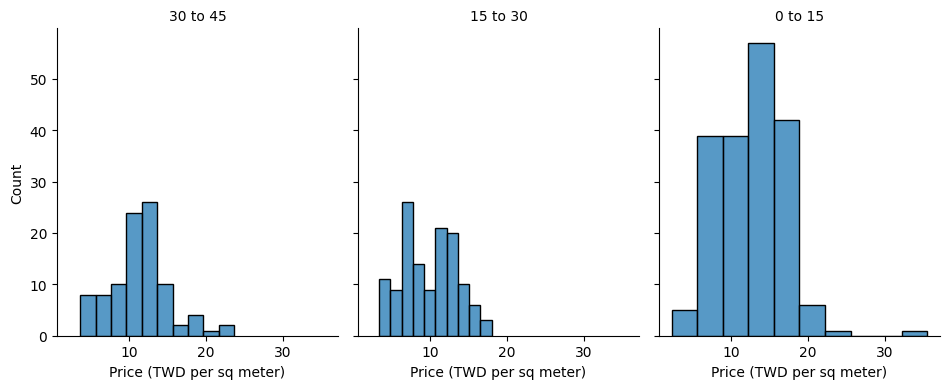

In [6]:
# Create a FacetGrid to make histograms of price_twd_msq split by house_age_years
g = sns.FacetGrid(
    data=taiwan_real_estate, col="house_age_years", col_wrap=3, height=4, aspect=0.8
)
g.map_dataframe(sns.histplot, x="price_twd_msq", bins=10)
g.set_axis_labels("Price (TWD per sq meter)", "Count")
g.set_titles("{col_name}")
plt.show()

### Calculating means by category
A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.

In [7]:
# Group taiwan_real_estate by house_age_years and calculate the mean price (price_twd_msq) for each age group. Assign the result to mean_price_by_age.
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")[
    "price_twd_msq"
].mean()
display(mean_price_by_age.round(3))

house_age_years
0 to 15     12.637
15 to 30     9.877
30 to 45    11.393
Name: price_twd_msq, dtype: float64

### Linear regression with a categorical explanatory variable
To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here you'll run a linear regression on the Taiwan real estate dataset.

In [8]:
# Run and fit a linear regression with price_twd_msq as the response variable, house_age_years as the explanatory variable, and taiwan_real_estate as the dataset. Assign to mdl_price_vs_age.
from statsmodels.formula.api import ols

mdl_price_vs_age = ols(
    formula="price_twd_msq ~ house_age_years", data=taiwan_real_estate
).fit()

print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [9]:
# Update the model formula so that no intercept is included in the model. Assign to mdl_price_vs_age0.
mdl_price_vs_age0 = ols(
    "price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate
).fit()

print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## The Goal of Prediction

The primary purpose of building a regression model is to make predictions. After fitting the model, it has learned the mathematical relationship between the explanatory variable(s) and the response variable. For a simple linear regression, this relationship is captured by the equation of a line:

$$\text{response} = \text{intercept} + \text{slope} \times \text{explanatory}$$

Prediction is the process of using this learned equation to estimate the `response` for any given value of the `explanatory` variable.

### Fitting the Model (Recap)

Before we can predict, we must first fit a model to our data. We will use `statsmodels` to learn the `intercept` and `slope` from a sample dataset.

```python
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'feature_val': np.linspace(20, 40, 50),
    'target_val': 50 + 4.5 * np.linspace(20, 40, 50) + np.random.normal(0, 25, 50)
})

# Fit a simple linear regression model
mdl_fitted = smf.ols(formula="target_val ~ feature_val", data=df).fit()

# Display the learned parameters
print(mdl_fitted.params)
```

The output provides the intercept and the slope for `feature_val`, defining our predictive equation.

### Generating and Using Predictions

To make predictions, we follow a three-step process: create new explanatory data, use the `.predict()` method, and then organize the results.

#### Step 1: Create New Explanatory Data

We don't typically predict on the data we used for training. Instead, we create a new DataFrame that contains the specific values of the explanatory variable(s) for which we want to generate predictions. **Crucially, the column name(s) in this new DataFrame must exactly match the feature name(s) used in the model's formula.**

```python
# Create a DataFrame with a range of feature values for which we want predictions
explanatory_data = pd.DataFrame({
    "feature_val": np.arange(20, 41) # Predict for values from 20 to 40
})

print(explanatory_data.head())
```

#### Step 2: Use the `.predict()` Method

The `.predict()` method of the fitted model takes the new explanatory data as an argument and returns a pandas Series containing the corresponding predicted values for the target variable.

```python
# Use the fitted model to make predictions on the new data
predictions = mdl_fitted.predict(explanatory_data)

print(predictions.head())
```

### Step 3: Organize the Predictions in a DataFrame

It is good practice to combine your explanatory data and its predictions into a single, tidy DataFrame. The `.assign()` method is a clean, pythonic way to add the predictions as a new column.

```python
# Add the predictions as a new column to the explanatory data
prediction_data = explanatory_data.assign(
    predicted_target=predictions
)

print(prediction_data.head())
```

This `prediction_data` DataFrame now clearly shows each input feature value and its corresponding model-predicted target value.


### Visualizing Predictions

A powerful way to understand your model's predictions is to visualize them alongside the original data and the regression line. We can layer a scatter plot of our predictions on top of a `seaborn.regplot` of the original data. The predicted points should fall exactly on the fitted line.

```python
# Create a figure with seaborn's object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original data and regression line using seaborn
sns.regplot(x="feature_val", y="target_val", data=df, ci=None, ax=ax,
            scatter_kws={'alpha': 0.6, 'color': 'steelblue'}, 
            line_kws={'color': 'navy', 'linewidth': 2})

# Overlay the predicted points
sns.scatterplot(x="feature_val", y="predicted_target", data=prediction_data, 
                color="red", marker="s", s=80, alpha=0.8, 
                label="Model Predictions", ax=ax)

# Enhance the plot aesthetics
ax.set_title("Linear Regression: Original Data vs Model Predictions", 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Feature Value", fontsize=12)
ax.set_ylabel("Target Value", fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

# Apply a clean seaborn style
sns.despine()
plt.tight_layout()
plt.show()
```

### The Danger of Extrapolation

**Extrapolation** is the act of making predictions for explanatory variable values that fall far outside the range of the data used to train the model. This is a highly risky practice.

A linear regression model only "knows" about the relationship between variables within the range of the observed data. There is no guarantee that this linear relationship holds true outside of that range. Using the model to extrapolate can lead to nonsensical or dangerously misleading predictions.

```python
# Create a DataFrame with a value far outside the original range (20 to 40)
extrapolate_data = pd.DataFrame({"feature_val": [10]})

# Predict on this extrapolated value
extrapolated_prediction = mdl_fitted.predict(extrapolate_data)

print(f"Prediction for feature_val=10: {extrapolated_prediction[0]:.2f}")
```

The model will dutifully apply its formula and produce a result. However, because we have no data in the region of `feature_val=10`, we have no evidence to suggest this prediction is reliable. For example, if the feature were length and the target were mass, this could predict a negative mass, which is physically impossible. **Predictions are only trustworthy within or very near the range of the original training data.**

In [10]:
# Create a DataFrame of explanatory data, where the number of convenience stores, n_convenience, takes the integer values from zero to ten.
explanatory_data = pd.DataFrame({"n_convenience": np.arange(0, 11)})
display(explanatory_data)

,n_convenience
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [11]:
# Use the model mdl_price_vs_conv to make predictions from explanatory_data and store it as price_twd_msq.
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print the predictions.
display(price_twd_msq.round(3))

0      8.224
1      9.022
2      9.820
3     10.618
4     11.417
5     12.215
6     13.013
7     13.811
8     14.609
9     15.407
10    16.205
dtype: float64

In [12]:
# Create a DataFrame of predictions named prediction_data. Start with explanatory_data, then add an extra column, price_twd_msq, containing the predictions you created in the previous step.
prediction_data = explanatory_data.assign(price_twd_msq=price_twd_msq)

# Print the result
display(prediction_data)

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


### Visualizing predictions
The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.

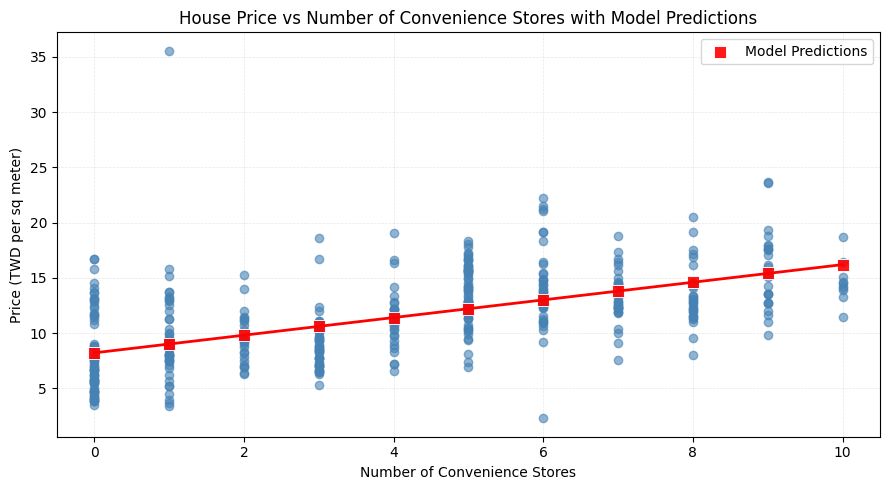

In [13]:
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the original data with regression line
sns.regplot(
    x="n_convenience",
    y="price_twd_msq",
    data=taiwan_real_estate,
    ci=None,
    line_kws={"color": "red", "linewidth": 2},
    scatter_kws={"alpha": 0.6, "color": "steelblue"},
    ax=ax,
)

# Plot the prediction points with distinct styling
sns.scatterplot(
    x="n_convenience",
    y="price_twd_msq",
    data=prediction_data,
    color="red",
    marker="s",
    s=80,
    alpha=0.9,
    label="Model Predictions",
    ax=ax,
)

# Improve labels and title
ax.set(
    xlabel="Number of Convenience Stores",
    ylabel="Price (TWD per sq meter)",
    title="House Price vs Number of Convenience Stores with Model Predictions",
)

# Enhance grid and styling
ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
ax.set_axisbelow(True)
ax.legend()

plt.tight_layout()
plt.show()

 To test the limits of the model's ability to predict, try some impossible situations.

Use the console to try predicting house prices from mdl_price_vs_conv when there are -1 convenience stores. Do the same for 2.5 convenience stores. What happens in each case?

Create some impossible explanatory data. Define a DataFrame impossible with one column, `n_convenience`, set to `-1` in the first row, and `2.5` in the second row.

In [14]:
impossible = pd.DataFrame({"n_convenience": [-1, 2.5]})

impossible_pred = mdl_price_vs_conv.predict(impossible)

display(impossible_pred)

0     7.426158
1    10.219437
dtype: float64

## The `statsmodels` Results Object

When you fit a model using `statsmodels` (e.g., via `smf.ols(...).fit()`), the returned object is not merely a prediction function. It is a comprehensive results object that holds a wealth of information about the fitted model, its parameters, and its statistical validity. Understanding how to access and interpret these attributes is key to moving from simple prediction to rigorous statistical analysis.

```python
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'feature_val': np.linspace(10, 50, 100),
    'target_val': 25 + 2.5 * np.linspace(10, 50, 100) + np.random.normal(0, 15, 100)
})

# Fit the model to get our results object
results = smf.ols(formula="target_val ~ feature_val", data=df).fit()
```
### Accessing Core Model Components

The results object provides direct access to the most fundamental parts of your fitted model.

#### **`.params`**: The Model Coefficients

This attribute holds a pandas Series containing the estimated optimal values for the model's parameters: the **intercept** and the **slope(s)**.

```python
# Access the fitted parameters
print(results.params)
```

#### **`.fittedvalues`**: The Predicted Values

This attribute contains the model's predictions ($\\hat{y}\_i$) for the **original explanatory data** used to train the model. This is equivalent to calling `results.predict()` on the original DataFrame.

```python
# Access the fitted values
print(results.fittedvalues.head())
```

#### **`.resid`**: The Residuals

The residuals are the errors of the model's predictions on the training data. Each residual is the difference between an actual response value ($y\_i$) and its corresponding fitted value ($\\hat{y}\_i$).

$$\text{residual}_i = \text{actual}_i - \text{fitted}_i = y_i - \hat{y}_i$$

Analyzing residuals is a critical diagnostic step for assessing a model's performance and checking its underlying assumptions.

```python
# Access the residuals
print(results.resid.head())
```

### The Comprehensive View: `.summary()`

The `.summary()` method provides a detailed, three-part statistical summary of the regression results. This is the most valuable feature of `statsmodels` for gaining deep insight into the model.

```python
# Print the full OLS regression summary
print(results.summary())
```

#### Part 1: Model Fit Statistics (Top Section)

This section provides high-level metrics about how well the model fits the data overall.

  * **`R-squared`**: The proportion of variance in the target variable that is explained by the model. A value of 0.85 means 85% of the target's variance is explained.
  * **`Adj. R-squared`**: An adjusted version of R-squared that penalizes the model for having too many explanatory variables, making it more suitable for comparing models with different numbers of features.
  * **`F-statistic` & `Prob (F-statistic)`**: Tests the overall significance of the model. A very small `Prob (F-statistic)` (e.g., \< 0.05) indicates that your model's features collectively have a statistically significant relationship with the target variable.

#### Part 2: Coefficient Statistics (Middle Table)

This is the most important part of the summary for interpreting the model. It provides detailed statistics for each model parameter (the intercept and each feature's slope).

| Column | Description |
| :--- | :--- |
| **`coef`** | The estimated value of the coefficient (the same as in `.params`). |
| **`std err`** | The **standard error** of the coefficient. It measures the average amount that the coefficient estimates vary from the actual average. A smaller standard error indicates a more precise estimate. |
| **`t`** | The **t-statistic**, calculated as `coef / std err`. It measures how many standard errors the coefficient is away from zero. A larger absolute t-statistic is more significant. |
| **`P`>|t|`** | The **p-value**. This is the probability of observing our result if the coefficient's true value were zero. A **small p-value (\< 0.05)** is strong evidence that the coefficient is **statistically significant**, meaning the corresponding feature has a meaningful relationship with the target variable. |
| **`[0.025 0.975]`**| The **95% confidence interval** for the coefficient. This is the range in which we are 95% confident the true value of the coefficient lies. If this interval does not contain zero, it reinforces that the coefficient is statistically significant. |

#### Part 3: Residual Diagnostics (Bottom Section)

This section provides tests to check if the residuals meet the assumptions of Ordinary Least Squares, primarily regarding their distribution.

  * **`Omnibus` / `Prob(Omnibus)`**: Tests for the normality of the residuals. A small p-value suggests the residuals are not normally distributed.
  * **`Durbin-Watson`**: Tests for autocorrelation in the residuals. A value near 2 suggests no autocorrelation.
  * **`Jarque-Bera (JB)` / `Prob(JB)`**: Another test for the normality of residuals.
  * **`Skew` and `Kurtosis`**: Measures of the shape of the residual distribution. For normally distributed residuals, skew should be near 0 and kurtosis should be near 3.

In [15]:
# Print the parameters of mdl_price_vs_conv.
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [16]:
# Print the fitted values of mdl_price_vs_conv.
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [17]:
# Print the residuals of mdl_price_vs_conv.
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [18]:
# Print a summary of mdl_price_vs_conv.
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           3.41e-37
Time:                        09:45:12   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

### Manually predicting house prices
You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use `.predict()`, but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

$$\text{response} = \text{intercept} + \text{slope} \times \text{explanatory}$$



In [19]:
# Get the coefficients/parameters of mdl_price_vs_conv, assigning to coeffs.
coeffs = mdl_price_vs_conv.params

# Get the intercept, which is the first element of coeffs, assigning to intercept.
intercept = coeffs.iloc[0]

# Get the slope, which is the second element of coeffs, assigning to slope.
slope = coeffs.iloc[1]

# Manually predict price_twd_msq using the formula, specifying the intercept, slope, and explanatory_data.
price_twd_msq = intercept + slope * explanatory_data

# Run the code to compare your manually calculated predictions to the results from .predict().
comparison = explanatory_data.assign(
    manual_predictions=price_twd_msq,
    predictions_auto=mdl_price_vs_conv.predict(explanatory_data),
)
display(comparison)

,n_convenience,manual_predictions,predictions_auto
0,0,8.224237,8.224237
1,1,9.022317,9.022317
2,2,9.820397,9.820397
3,3,10.618477,10.618477
4,4,11.416556,11.416556
5,5,12.214636,12.214636
6,6,13.012716,13.012716
7,7,13.810795,13.810795
8,8,14.608875,14.608875
9,9,15.406955,15.406955


## The Anatomy of a Prediction

To understand regression to the mean, we must first revisit the fundamental equation that defines a model's prediction:

$$\text{Actual Response} = \text{Fitted Value} + \text{Residual}$$

This can be more intuitively understood as:

$$\text{Actual Outcome} = \text{Model Prediction} + \text{Unexplained Error}$$

The **residual** is a critical component. It represents everything that the model could not explain. This "unexplained error" is a combination of two things:

1.  **Model Deficiencies**: Factors that influence the outcome but are not included in your model.
2.  **Fundamental Randomness**: Natural, unpredictable variation. You can think of this as "luck."

### The Role of Randomness in Extreme Events

For an observation to be *extremely* high or low, it typically requires two things to happen simultaneously:

1.  The true underlying value (the part the model can predict) is already far from the average.
2.  The random component (the residual) for that specific observation also happens to be large and in the same direction.

Consider the classic example that led to the discovery of this phenomenon: **Pearson's father-son height data**. For a father to be *extremely* tall, he likely has a combination of a high "genetic potential" for height (a high fitted value) *and* favorable random factors (excellent nutrition, no growth-stunting childhood illnesses, etc.).

### The "Regression" in Action

The question Pearson investigated was: "Do tall fathers have tall sons?" The answer is yes, but with a crucial caveat. The sons of extremely tall fathers are, on average, also tall—but **less tall than their fathers**. Conversely, the sons of extremely short fathers are, on average, also short—but **less short than their fathers**.

This is regression to the mean. The son of an extremely tall father will likely inherit the high genetic potential, so his predicted height will be tall. However, it is statistically unlikely that the son will *also* experience the same large, positive "luck" or random component that his father did. The son's random component is more likely to be closer to zero (average).

Therefore, the son's actual height is more likely to be closer to the average height for someone with his genetic potential, which is itself closer to the overall population mean. His height "regresses" (or moves back) toward the mean.

### Visualizing Regression to the Mean

This phenomenon is perfectly illustrated by plotting the data alongside two key lines:

1.  **The `y = x` Line**: This represents a "perfect inheritance" scenario where a son's height is exactly equal to his father's height. If the phenomenon did not exist, the data would cluster around this line.
2.  **The Regression Line**: This is the actual line of best fit for the data, representing the model's predictions.

The key insight comes from comparing these two lines. In nearly all such cases, the **regression line is less steep than the `y = x` line**. This shallower slope is the visual proof of regression to the mean.

  * For a tall father (far to the right on the x-axis), the regression line (the prediction) lies *below* the `y = x` line, indicating the son is predicted to be shorter than his father.
  * For a short father (far to the left on the x-axis), the regression line lies *above* the `y = x` line, indicating the son is predicted to be taller than his father.


```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset that mimics Pearson's data
np.random.seed(10)
father_height_cm = np.random.normal(loc=175, scale=5, size=500)
# Son's height is a function of father's height + some randomness.
# The slope is ~0.5, a classic regression-to-the-mean effect.
son_height_cm = 85 + 0.5 * father_height_cm + np.random.normal(0, 5, 500)
df = pd.DataFrame({'father_height_cm': father_height_cm, 'son_height_cm': son_height_cm})

# Fit the model to get the slope 
mdl_height = smf.ols("son_height_cm ~ father_height_cm", data=df).fit()
print(mdl_height.params)

# Visualize the phenomenon 
# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create scatter plot with regression line
sns.scatterplot(data=df, x="father_height_cm", y="son_height_cm", ax=ax, alpha=0.6)
sns.regplot(data=df, x="father_height_cm", y="son_height_cm", ax=ax, 
            scatter=False, ci=None, line_kws={'color': 'black', 'label': 'Regression Line'})

# Plot the y=x line (the "perfect inheritance" line)
ax.axline(xy1=(160, 160), slope=1, color="green", linestyle="--", label="y = x Line")

ax.set_aspect('equal')
ax.set_title("Regression to the Mean: Father vs. Son Height")
ax.set_xlabel("Father's Height (cm)")
ax.set_ylabel("Son's Height (cm)")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()
```

The fitted slope of approximately **0.5** confirms the visual evidence. It means that for every one centimeter of height a father has above the average, his son is predicted to be only about half a centimeter above the average, demonstrating a clear regression to the mean.

In [20]:
# Load Pearson's father-son height dataset from a remote TSV file
# This is the famous dataset that led to the discovery of "regression to the mean"
pearson_df = pd.read_csv(
    "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/regression_with_statsmodels/data/Pearson.tsv",
    sep="\t",  # Tab-separated values format
)

# Convert height measurements from inches to centimeters for easier interpretation
# Conversion factor: 1 inch = 2.54 centimeters
conversion_dict = {"Father": lambda x: x * 2.54, "Son": lambda x: x * 2.54}

# Apply the conversion using pandas assign with dictionary unpacking
# This creates new columns with converted values, replacing the original inch measurements
pearson_df = pearson_df.assign(
    **{col: func(pearson_df[col]) for col, func in conversion_dict.items()}
)

# Round the converted measurements to 3 decimal places for cleaner display
pearson_df = pearson_df.round(3)

pearson_df.head()

,Father,Son
0,165.100,151.892
1,160.782,160.528
2,165.100,160.782
3,167.132,159.512
4,155.194,163.322


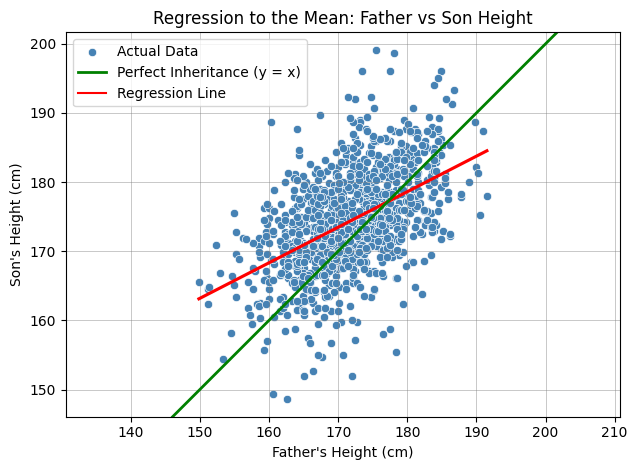

In [21]:
# Create a scatter plot to visualize the relationship between father and son heights
fig, ax = plt.subplots()

# Plot the actual data points (father height vs son height)
sns.scatterplot(
    x="Father", y="Son", data=pearson_df, ax=ax, color="steelblue", label="Actual Data"
)

# Add the fitted regression line to show the actual relationship
# This line has a slope less than 1, demonstrating regression to the mean
sns.regplot(
    x="Father",
    y="Son",
    data=pearson_df,
    ci=None,  # Don't show confidence interval for cleaner visualization
    line_kws={"color": "red"},
    scatter=False,  # Don't plot points again (already done above)
    ax=ax,
)

# Set descriptive labels and title for the plot
ax.set(
    xlabel="Father's Height (cm)",
    ylabel="Son's Height (cm)",
    title="Regression to the Mean: Father vs Son Height",
)

# Add the "perfect inheritance" line where son's height = father's height
# This represents what we would see if there was NO regression to the mean
# The fact that the regression line (red) is flatter than this line (green) proves regression to the mean
ax.axline(
    xy1=(150, 150),  # Starting point for the y=x line
    slope=1,  # Slope of 1 means son height = father height
    linewidth=2,
    color="green",
    label="Perfect Inheritance (y = x)",
)

# Manually add the regression line to the legend
# (regplot doesn't automatically add itself to legends)
ax.plot([], [], color="red", label="Regression Line")

ax.grid(True, alpha=0.5, color="grey", linewidth=0.6)

ax.legend()

# Make the axes equal so distances look the same in both directions
plt.axis("equal")

plt.tight_layout()
plt.show()

In [22]:
mdl_son_vs_father = ols(formula="Son ~ Father", data=pearson_df).fit()
print(mdl_son_vs_father.params)

Intercept    86.087713
Father        0.514006
dtype: float64


In [23]:
tall_father = pd.DataFrame({"Father": [190]})
mdl_son_vs_father.predict(tall_father)

0    183.748837
dtype: float64

In [24]:
short_father = pd.DataFrame({"Father": [150]})
mdl_son_vs_father.predict(short_father)

0    163.1886
dtype: float64

### Plotting consecutive portfolio returns
Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

The `sp500_yearly_returns` dataset contains three columns:

| Variable | Meaning |
|----------|---------|
| `symbol` | Stock ticker symbol uniquely identifying the company. |
| `return_2018` | A measure of investment performance in 2018. |
| `return_2019` | A measure of investment performance in 2019. |

A positive number for the return means the investment increased in value; negative means it lost value.

Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.

In [25]:
sp500_yearly_returns = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/5857/datasets/a1b3250502377f2b0b963a5ec3ef7c453572077d/sp500_yearly_returns.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


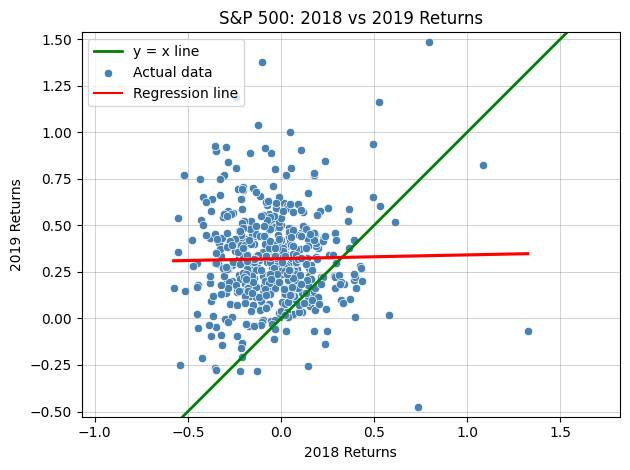

In [26]:
fig, ax = plt.subplots()

plt.axline(xy1=(0, 0), slope=1, linewidth=2, color="green", label="y = x line")

# Add scatter plot with linear regression trend line
sns.scatterplot(
    x="return_2018",
    y="return_2019",
    data=sp500_yearly_returns,
    ax=ax,
    color="steelblue",
    label="Actual data",
)
sns.regplot(
    x="return_2018",
    y="return_2019",
    data=sp500_yearly_returns,
    ci=None,
    line_kws={"color": "red"},
    scatter=False,
    ax=ax,
)

# Add regression line to legend
ax.plot([], [], color="red", label="Regression line")

ax.set(
    xlabel="2018 Returns", ylabel="2019 Returns", title="S&P 500: 2018 vs 2019 Returns"
)
ax.grid(True, alpha=0.5, color="grey", linewidth=0.5)
ax.legend(loc="upper left")

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")
plt.tight_layout()
plt.show()

### Modeling consecutive returns
Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

In [27]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols(formula="return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame named explanatory_data. Give it one column (return_2018) with 2018 returns set to a list containing -1, 0, and 1.
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})

print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


## Why Transform Variables?

Linear regression models are powerful, but they rely on two key assumptions about the data:

1.  **Linearity**: The underlying relationship between the explanatory and response variables is linear.
2.  **Homoscedasticity**: The variance of the residuals (the model's errors) is constant across all levels of the explanatory variables.

When these assumptions are violated, the model's predictions and the statistical inferences drawn from it can be unreliable. Variable transformations are a primary tool for addressing these violations.

### Correcting for Non-Linearity

Often, the relationship between two variables is not a straight line. For example, the relationship between a fish's length and its mass is physical; mass (related to volume) is expected to increase with the *cube* of its length, not linearly.

  * **The Problem**: A scatter plot of the raw data shows a distinct curve. A straight regression line will systematically under-predict at the low and high ends and over-predict in the middle, making it a poor fit.

  * **The Solution: Polynomial Transformation**. We can often linearize the relationship by applying a polynomial transformation to the explanatory variable. By creating a new feature, `x_cubed = x**3`, we can model the response as a linear function of this *new* feature. The model equation becomes:

    $$\text{response} = b_0 + b_1 \times (\text{explanatory}^3)$$

    This is still considered a **linear model** because the equation is linear *in its parameters* ($b\_0$ and $b\_1$).


```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Create synthetic data with a cubic relationship
np.random.seed(42)
df_poly = pd.DataFrame({'x': np.linspace(1, 10, 100)})
df_poly['y_cubic'] = 0.5 * df_poly['x']**3 + np.random.normal(0, 20, 100)

# Visualize the problem and solution
plt.figure(figsize=(12, 5))

# 1. Plot of the original non-linear relationship
plt.subplot(1, 2, 1)
sns.regplot(x='x', y='y_cubic', data=df_poly, ci=None, line_kws={"color": "red"})
plt.title("Original Data: Non-Linear Relationship")

# 2. Create the transformed feature and plot again
df_poly['x_cubed'] = df_poly['x']**3
plt.subplot(1, 2, 2)
sns.regplot(x='x_cubed', y='y_cubic', data=df_poly, ci=None, line_kws={"color": "red"})
plt.title("Transformed Data: Linear Relationship")

plt.tight_layout()
plt.show()
```

The transformation successfully creates a linear relationship, making the data suitable for a linear regression model.


### Correcting for Non-Constant Variance (Heteroscedasticity)

Another common issue is **heteroscedasticity**, where the scatter of the residuals increases as the value of the explanatory variable increases. This often appears as a "fanning out" or "cone" shape in the scatter plot.

  * **The Problem**: The model's predictions will be less reliable for larger values of the explanatory variable. This violates the homoscedasticity assumption.

  * **The Solution: Stabilizing Transformations**. Functions that compress larger values, such as the **logarithm** or **square root**, are excellent for stabilizing variance. Applying such a transformation to the response variable (and often the explanatory variable as well) can make the errors more uniform. A common model form is the log-log model:

    $$\log(\text{response}) = b_0 + b_1 \times \log(\text{explanatory})$$

### Modeling and Predicting with Transformed Data

When you build a model with transformed variables, the prediction process requires careful attention to ensure the final output is in the correct, original units.

**The Workflow:**

1.  **Fit the model** using the transformed variable(s) in the formula.
2.  Create new explanatory data in its **original units**.
3.  Use the model's `.predict()` method. `statsmodels` is smart enough to apply the transformation from your formula to the new data automatically.
4.  If the **response variable was transformed**, you must apply the **inverse transformation** to the predictions to convert them back to their original scale.

#### Example: Prediction with a Polynomial Model

```python
# 1. Fit the model using the transformed feature
mdl_poly = smf.ols("y_cubic ~ x_cubed", data=df_poly).fit()

# 2. Create new explanatory data in ORIGINAL units
explanatory_data = pd.DataFrame({"x": np.arange(1, 11)})

# 3. Transform the new data just as we did the training data
explanatory_data['x_cubed'] = explanatory_data['x']**3

# 4. Predict using the transformed data
predictions = mdl_poly.predict(explanatory_data)

# Combine for a clear view. The response variable was not transformed,
# so no inverse transformation is needed here.
prediction_results = explanatory_data.assign(predicted_y=predictions)
print(prediction_results[['x', 'predicted_y']])
```

#### Example: Prediction with a Log-Log Model (Requires Inverse Transform)

```python
# Create data suitable for a log-log model
np.random.seed(42)
df_log = pd.DataFrame({'x': np.linspace(10, 1000, 100)})
df_log['y'] = np.exp(0.5 * np.log(df_log['x']) + 2 + np.random.normal(0, 0.1, 100))

# 1. Fit the model on the LOG of the variables
# The np.log() function is applied directly in the formula
mdl_log = smf.ols("np.log(y) ~ np.log(x)", data=df_log).fit()

# 2. Create new data in ORIGINAL units
explanatory_data_log = pd.DataFrame({"x": [10, 100, 500, 1000]})

# 3. Predict. statsmodels will automatically take the log of the new 'x' data.
# The prediction returned is on the log scale (it is a prediction of log(y)).
log_predictions = mdl_log.predict(explanatory_data_log)

# 4. Apply the INVERSE transformation (np.exp) to get back to original units.
final_predictions = np.exp(log_predictions)

# Combine for a clear view
prediction_results_log = explanatory_data_log.assign(predicted_y=final_predictions)
print(prediction_results_log)
```

This final step of applying the inverse transformation is critical for making your model's predictions interpretable and useful in the original context of the problem.

In [28]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


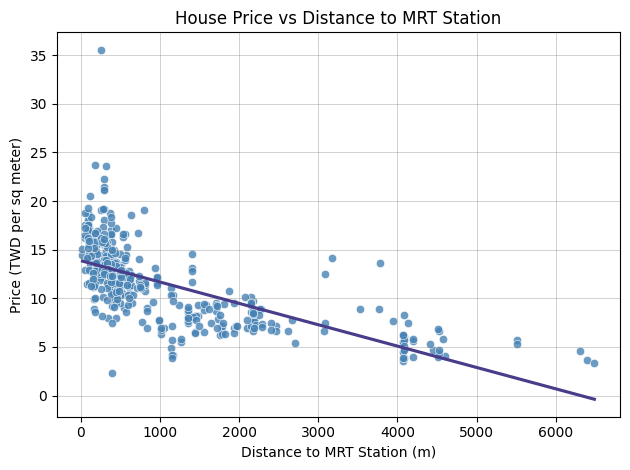

In [29]:
# Create a scatter plot with regression line to visualize the relationship between
# distance to MRT station and house price per square meter

# Initialize matplotlib figure and axis for the plot
fig, ax = plt.subplots()

# Create scatter plot of house prices vs distance to MRT station
sns.scatterplot(
    x="dist_to_mrt_m",
    y="price_twd_msq",
    data=taiwan_real_estate,
    color="steelblue",
    alpha=0.8,
    ax=ax,
)

# Add a linear regression trend line to show the relationship
sns.regplot(
    x="dist_to_mrt_m",
    y="price_twd_msq",
    data=taiwan_real_estate,
    scatter=False,
    ci=None,
    line_kws={"color": "darkslateblue"},
    ax=ax,
)

# Set descriptive labels and title for the plot
# This helps viewers understand what the visualization shows
ax.set(
    xlabel="Distance to MRT Station (m)",
    ylabel="Price (TWD per sq meter)",
    title="House Price vs Distance to MRT Station",
)

# Add a subtle grid to make it easier to read values from the plot
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")

plt.tight_layout()
plt.show()

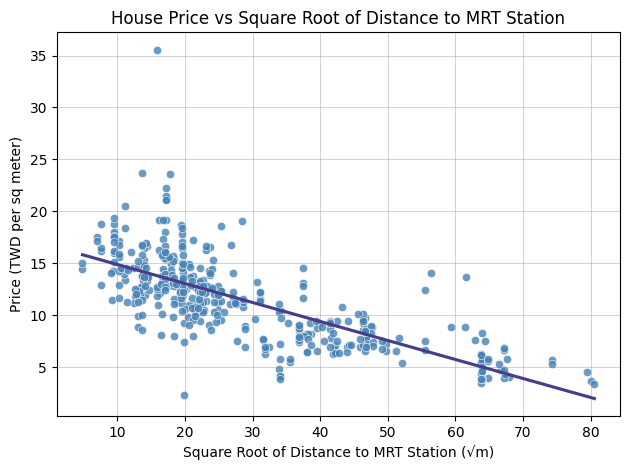

In [30]:
# Add a new column to taiwan_real_estate called sqrt_dist_to_mrt_m that contains the square root of dist_to_mrt_m.
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Create the same scatter plot as the first one, but use the new transformed variable on the x-axis instead.
fig, ax = plt.subplots()

sns.scatterplot(
    x="sqrt_dist_to_mrt_m",
    y="price_twd_msq",
    data=taiwan_real_estate,
    color="steelblue",
    alpha=0.8,
    ax=ax,
)
sns.regplot(
    x="sqrt_dist_to_mrt_m",
    y="price_twd_msq",
    data=taiwan_real_estate,
    scatter=False,
    ci=None,
    line_kws={"color": "darkslateblue"},
    ax=ax,
)

# Set the axis labels and title for the transformed scatter plot
# The x-axis now shows the square root of distance (transformed variable)
# This transformation helps linearize the relationship between distance and price
ax.set(
    xlabel="Square Root of Distance to MRT Station (√m)",
    ylabel="Price (TWD per sq meter)",
    title="House Price vs Square Root of Distance to MRT Station",
)

ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
plt.tight_layout()
plt.show()

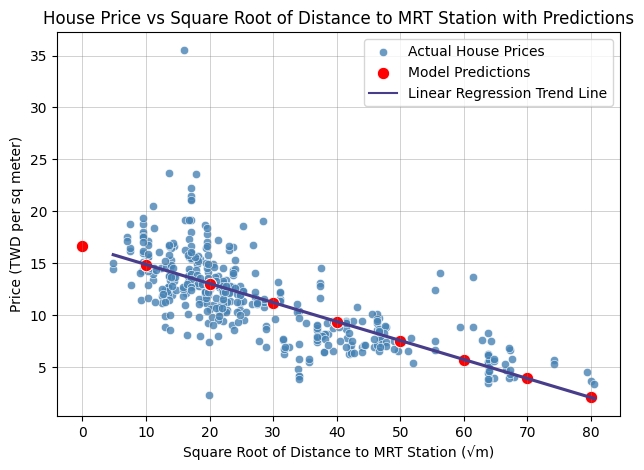

In [31]:
# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
# This uses the square root transformation to linearize the relationship
mdl_price_vs_dist = ols(
    "price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate
).fit()

# Generate distances from 0 to 6400 meters (0², 10², 20², ..., 80²)
# Include both the original distance and its square root transformation
explanatory_data = pd.DataFrame(
    {
        "sqrt_dist_to_mrt_m": np.sqrt(
            np.arange(0, 81, 10) ** 2
        ),  # Square root of distances (for model input)
        "dist_to_mrt_m": np.arange(0, 81, 10)
        ** 2,  # Original distances (for reference)
    }
)

# Generate predictions using the fitted model
# Create a DataFrame of predictions by adding price predictions to explanatory data
prediction_data = explanatory_data.assign(
    price_twd_msq=mdl_price_vs_dist.predict(explanatory_data)
)

# Create visualization showing actual data, regression line, and model predictions
fig, ax = plt.subplots()

# Plot the actual house price data as blue scatter points
sns.scatterplot(
    x="sqrt_dist_to_mrt_m",
    y="price_twd_msq",
    data=taiwan_real_estate,
    color="steelblue",
    alpha=0.8,
    ax=ax,
    label="Actual House Prices",
)

# Add the linear regression trend line (fitted to transformed data)
sns.regplot(
    x="sqrt_dist_to_mrt_m",
    y="price_twd_msq",
    data=taiwan_real_estate,
    scatter=False,  # Don't plot points again
    ci=None,  # Don't show confidence interval
    line_kws={"color": "darkslateblue"},
    ax=ax,
)

# Overlay the model predictions as red points
# These should fall exactly on the regression line
sns.scatterplot(
    x="sqrt_dist_to_mrt_m",
    y="price_twd_msq",
    data=prediction_data,
    color="red",
    s=80,  # Larger point size for visibility
    ax=ax,
    label="Model Predictions",
)

# Manually add regression line to legend (since regplot doesn't add it automatically)
ax.plot([], [], color="darkslateblue", label="Linear Regression Trend Line")

# Customize plot appearance and labels
ax.set(
    xlabel="Square Root of Distance to MRT Station (√m)",
    ylabel="Price (TWD per sq meter)",
    title="House Price vs Square Root of Distance to MRT Station with Predictions",
)

# Add grid for better readability and display legend
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.legend()
plt.tight_layout()
plt.show()

### Transforming the response variable too
The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In [32]:
ad_conversion = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/5857/datasets/0cf3e07bf5595ee7379e56646639d3bc56026aae/ad_conversion.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


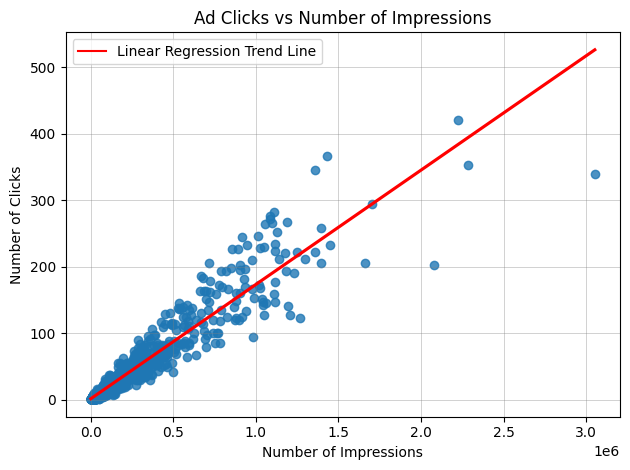

In [33]:
# Create a regression plot to visualize the relationship between ad impressions and clicks
# This plot will help us identify if there are issues with linearity or heteroscedasticity
fig, ax = plt.subplots()

# Create a scatter plot with regression line using the original (untransformed) variables
# The regression line shows the linear relationship that the model would fit to this data
sns.regplot(
    x="n_impressions",
    y="n_clicks",
    data=ad_conversion,
    scatter=True,
    ci=None,
    line_kws={"color": "red"},
    ax=ax,
)

# Manually add the regression line to the legend
# (regplot doesn't automatically add itself to the legend)
ax.plot([], [], color="red", label="Linear Regression Trend Line")

# Set descriptive labels and title to make the plot interpretable
# This helps viewers understand what relationship is being visualized
ax.set(
    xlabel="Number of Impressions",
    ylabel="Number of Clicks",
    title="Ad Clicks vs Number of Impressions",
)

# Add a subtle grid to make it easier to read values from the plot
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")

ax.legend()

# Adjust layout to prevent any text cutoff and display the plot
plt.tight_layout()
plt.show()

### Transforming the response variable too
The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In [34]:
# Create fourth root transformations for both impression and click variables
# This transformation helps linearize the relationship and stabilize variance


# Iterates through column names: ["n_impressions", "n_clicks"]
# For each column, creates a new column name with "qdrt_" prefix
# Applies fourth root transformation (** 0.25) to each column's values
# Results in: {"qdrt_n_impressions": transformed_values, "qdrt_n_clicks": transformed_values}

ad_conversion = ad_conversion.assign(
    **{
        f"qdrt_{col}": ad_conversion[col] ** 0.25  # Fourth root: x^(1/4) = x^0.25
        for col in [
            "n_impressions",
            "n_clicks",
        ]  # Apply to both impression and click columns
    }
)

# The ** operator unpacks the dictionary, equivalent to:
# ad_conversion.assign(
#     qdrt_n_impressions=ad_conversion["n_impressions"] ** 0.25,
#     qdrt_n_clicks=ad_conversion["n_clicks"] ** 0.25
# )

# Display the first few rows to verify the transformations were applied
display(ad_conversion.head())

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks
0,1.43,7350,1,9.259165,1.000000
1,1.82,17861,2,11.560495,1.189207
2,1.25,4259,1,8.078429,1.000000
3,1.29,4133,1,8.018006,1.000000
4,4.77,15615,3,11.178551,1.316074


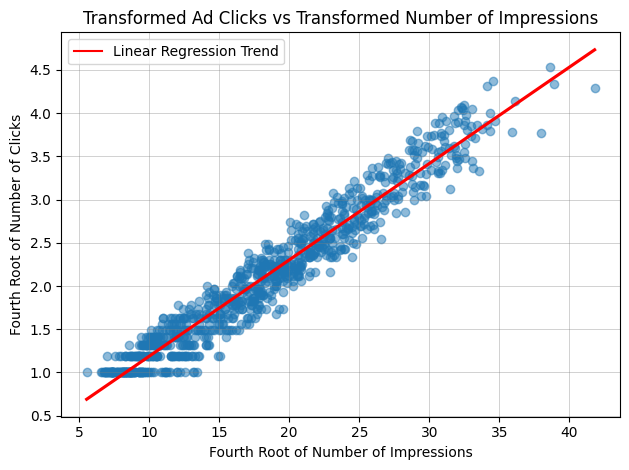

In [35]:
# Create a regression plot using the transformed variables to assess model fit
# This visualization helps us evaluate whether the fourth root transformation
# successfully linearized the relationship and reduced heteroscedasticity

fig, ax = plt.subplots()

# Create scatter plot with regression line using the transformed variables
# The fourth root transformation should make the relationship more linear
# and the variance more constant across different impression levels
sns.regplot(
    x="qdrt_n_impressions",
    y="qdrt_n_clicks",
    data=ad_conversion,
    scatter=True,
    ci=None,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.5},
    ax=ax,
)

# Manually add regression line to legend since regplot doesn't do this automatically
ax.plot([], [], color="red", label="Linear Regression Trend")

# Set descriptive labels that clearly indicate we're using transformed variables
# This is important because the scale is no longer in original units
ax.set(
    xlabel="Fourth Root of Number of Impressions",
    ylabel="Fourth Root of Number of Clicks",
    title="Transformed Ad Clicks vs Transformed Number of Impressions",
)

# Add grid for easier reading of values and include legend
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.legend()
plt.tight_layout()
plt.show()

In [36]:
# Run a linear regression of qdrt_n_clicks versus qdrt_n_impressions using ad_conversion and assign it to mdl_click_vs_impression.
# This model uses the fourth root transformed variables to address non-linearity and heteroscedasticity
mdl_click_vs_impression = ols(
    formula="qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion
).fit()

# Create explanatory data for making predictions
# We want to predict for impression values from 0 to 3 million in steps of 500k
explanatory_data = pd.DataFrame(
    {
        # Apply fourth root transformation to impression values for the model
        # The model expects transformed data, so we transform raw values (0, 500k, 1M, etc.)
        "qdrt_n_impressions": np.arange(0, 3e6 + 1, 5e5) ** 0.25,
        # Keep original impression values for reference and interpretability
        "n_impressions": np.arange(0, 3e6 + 1, 5e5),
    }
)

# Use the fitted model to predict on the transformed explanatory data
# The model returns predictions in transformed units (fourth root of clicks)
prediction_data = explanatory_data.assign(
    qdrt_n_clicks=mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result - note that qdrt_n_clicks are in transformed units
# To get actual click predictions, we would need to apply the inverse transformation (raise to power 4)
display(prediction_data)

,qdrt_n_impressions,n_impressions,qdrt_n_clicks
0,0.000000,0.0,0.071748
1,26.591479,500000.0,3.037576
2,31.622777,1000000.0,3.598732
3,34.996355,1500000.0,3.974998
4,37.606031,2000000.0,4.266063
5,39.763536,2500000.0,4.506696
6,41.617915,3000000.0,4.713520


Back transform the response variable in prediction_data by raising qdrt_n_clicks to the power 4 to get n_clicks.

In [37]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

display(prediction_data)

,qdrt_n_impressions,n_impressions,qdrt_n_clicks,n_clicks
0,0.000000,0.0,0.071748,0.000026
1,26.591479,500000.0,3.037576,85.135121
2,31.622777,1000000.0,3.598732,167.725102
3,34.996355,1500000.0,3.974998,249.659131
4,37.606031,2000000.0,4.266063,331.214159
5,39.763536,2500000.0,4.506696,412.508546
6,41.617915,3000000.0,4.713520,493.607180


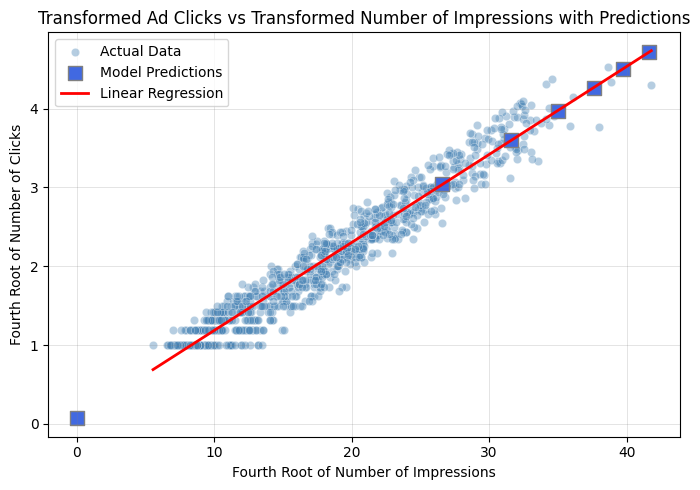

In [38]:
# Plot the transformed variables with better visibility
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the original data points
sns.scatterplot(
    x="qdrt_n_impressions",
    y="qdrt_n_clicks",
    data=ad_conversion,
    alpha=0.4,
    color="steelblue",
    label="Actual Data",
    ax=ax,
)

# Add regression line without scatter points
sns.regplot(
    x="qdrt_n_impressions",
    y="qdrt_n_clicks",
    data=ad_conversion,
    ci=None,
    scatter=False,  # Don't plot points again
    line_kws={"color": "red", "linewidth": 2},
    ax=ax,
)

# Add prediction points with more contrast
sns.scatterplot(
    x="qdrt_n_impressions",
    y="qdrt_n_clicks",
    data=prediction_data,
    color="royalblue",
    s=90,  # Larger points
    marker=",",  # Pixel shape
    edgecolor="grey",  # grey border
    linewidth=1,
    label="Model Predictions",
    ax=ax,
)

# Manually add regression line to legend
ax.plot([], [], color="red", linewidth=2, label="Linear Regression")

ax.set(
    xlabel="Fourth Root of Number of Impressions",
    ylabel="Fourth Root of Number of Clicks",
    title="Transformed Ad Clicks vs Transformed Number of Impressions with Predictions",
)

ax.grid(True, alpha=0.3, linewidth=0.5, color="grey")
ax.legend()
plt.tight_layout()
plt.show()

## Coefficient of Determination ($R^2$)

The **coefficient of determination**, commonly known as **R-squared** or **$R^2$**, is one of the most common metrics for evaluating a regression model. It quantifies the proportion of the variance in the response variable that can be predicted from the explanatory variable(s).

  * **Range**: The value of $R^2$ ranges from 0 to 1.
  * **Interpretation**:
      * An $R^2$ of 1 indicates that the model perfectly explains all the variability in the response variable.
      * An $R^2$ of 0 indicates that the model explains none of the variability; it is no better than a model that simply predicts the mean of the response.
      * An $R^2$ of 0.85 means that 85% of the variance in the response can be explained by the explanatory variables in the model.

In `statsmodels`, you can find the $R^2$ value in the `.summary()` output or access it directly via the `.rsquared` attribute.

#### $R^2$ and Correlation

For a **simple linear regression** (with only one explanatory variable), the $R^2$ value is mathematically equivalent to the square of the Pearson correlation coefficient between the explanatory and response variables.

$$R^2 = (\text{correlation}(x, y))^2$$

### Measuring Typical Prediction Error

While $R^2$ provides a proportional measure of fit, it doesn't tell you how large the prediction errors are in absolute terms. For this, we use metrics based on the model's residuals.

#### Residual Standard Error (RSE)

The **Residual Standard Error (RSE)** is an estimate of the standard deviation of the residuals. It represents the "typical" size of the error between a model's prediction and an actual observed value, measured in the **same units as the response variable**. A smaller RSE indicates a better model fit.

The RSE is calculated as the square root of the sum of squared residuals divided by the **degrees of freedom**.

$$RSE = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - k}}$$

  * `n` is the number of observations.
  * `k` is the number of **coefficients** estimated by the model. For a simple linear regression ($y = ax + b$), we estimate two coefficients (the slope `a` and the intercept `b`), so `k=2`. The denominator `n-2` is the degrees of freedom.

#### Root Mean Squared Error (RMSE)

The **Root Mean Squared Error (RMSE)** is another common metric that also measures the typical magnitude of the prediction error. Its formula is very similar to RSE:

$$RMSE = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n}}$$

#### The Key Difference: RSE vs. RMSE

The only difference between RSE and RMSE is the denominator:

  * **RSE** divides by the degrees of freedom, `n - k`. It is considered an *unbiased estimate* of the standard deviation of the true underlying errors in the population and is a key metric in statistical inference.
  * **RMSE** divides by the number of observations, `n`. It is a measure of the average error magnitude for your specific sample of data and is more commonly used in a predictive machine learning context.

For large datasets, the difference between RSE and RMSE is negligible.


### Practical Implementation in `statsmodels`

Let's see how to calculate these metrics using a fitted `statsmodels` object.

```python
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'feature_val': np.linspace(10, 50, 100),
    'target_val': 25 + 2.5 * np.linspace(10, 50, 100) + np.random.normal(0, 15, 100)
})

# Fit the model
results = smf.ols(formula="target_val ~ feature_val", data=df).fit()

# 1. Get R-squared 
print(f"R-squared from summary: {results.rsquared:.4f}")

# For simple linear regression, verify with correlation
correlation_sq = df['feature_val'].corr(df['target_val']) ** 2
print(f"Correlation squared:    {correlation_sq:.4f}")

# 2. Get Residual Standard Error (RSE)
# The easy way, using the model's mean squared residuals attribute
rse = np.sqrt(results.mse_resid)
print(f"\nRSE (from model attribute): {rse:.4f}")

# The manual way, to understand the formula
sum_of_squared_residuals = np.sum(results.resid ** 2)
n = len(df.index)
k = 2 # Two coefficients: intercept and slope for feature_val
degrees_of_freedom = n - k
rse_manual = np.sqrt(sum_of_squared_residuals / degrees_of_freedom)
print(f"RSE (calculated manually):  {rse_manual:.4f}")

# 3. Calculate Root Mean Squared Error (RMSE) for comparison 
# Note the denominator is n, not n-k
rmse = np.sqrt(sum_of_squared_residuals / n)
print(f"RMSE (for comparison):      {rmse:.4f}")

print(f"\nInterpretation: A typical prediction from this model is off by about {rse:.2f} units.")
```

This shows that while the concepts are statistical, their calculation in Python is straightforward, and the `statsmodels` results object provides direct access to most of what you need.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. Two models are available: mdl_click_vs_impression_orig models n_clicks versus n_impressions. mdl_click_vs_impression_trans is the transformed model you saw in Chapter 2. It models n_clicks to the power of 0.25 versus n_impressions to the power of 0.25.



In [39]:
# The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.
# mdl_click_vs_impression_orig models n_clicks versus n_impressions
mdl_click_vs_impression_orig = ols(
    formula="n_clicks ~ n_impressions", data=ad_conversion
).fit()

# n_clicks to the power of 0.25 versus n_impressions to the power of 0.25
mdl_click_vs_impression_trans = ols(
    formula="qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion
).fit()

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())
# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Tue, 22 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:45:15   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [40]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


In [41]:
# Calculate the MSE of mdl_click_vs_impression_orig, assigning to mse_orig.
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Using mse_orig, calculate and print the RSE of mdl_click_vs_impression_orig.
rse_orig = np.sqrt(mse_orig)
print(f"RSE of original model: {rse_orig}")

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print(f"RSE of transformed model: {rse_trans}")

RSE of original model: 19.905838862478138
RSE of transformed model: 0.19690640896875722


## Why Visualize Residuals?

Numerical metrics like R-squared ($R^2$) provide a single number to summarize model performance, but they do not tell the whole story. A model can have a high $R^2$ yet still be fundamentally flawed because it violates the core assumptions of Ordinary Least Squares (OLS) regression. Visual diagnostics are essential for verifying these assumptions:

1.  **Linearity**: The underlying relationship between the features and the target is linear.
2.  **Normality**: The residuals are normally distributed around a mean of zero.
3.  **Homoscedasticity**: The residuals have a constant variance (i.e., the spread of the errors is consistent) across all levels of the explanatory variables.

### The Residuals vs. Fitted Plot

This is the most important diagnostic plot. It plots the model's residuals on the y-axis against the model's fitted (predicted) values on the x-axis. It is a powerful tool for identifying non-linearity and heteroscedasticity.

  * **What a "Good" Plot Looks Like**: The points should form a random, horizontal band centered around the zero line. There should be no discernible curve, U-shape, or funnel shape. This indicates that the linearity and constant variance assumptions are likely met.
  * **What a "Bad" Plot Looks Like**:
      * A clear **curved or U-shaped pattern** suggests the relationship in the data was not linear, and the model is systematically failing.
      * A **funnel or cone shape** (where the spread of the residuals increases as the fitted values increase) indicates **heteroscedasticity**, meaning the variance of the errors is not constant.

### The Q-Q (Quantile-Quantile) Plot

This plot is used to specifically check if the residuals follow a normal distribution. It plots the quantiles of your model's residuals against the theoretical quantiles of a perfect normal distribution.

  * **What a "Good" Plot Looks Like**: The data points should fall closely along the straight diagonal reference line. This indicates that the distribution of the residuals is very similar to a normal distribution.
  * **What a "Bad" Plot Looks Like**: Systematic deviations from the line, such as an S-shape or the points bowing away at the tails, indicate that the residuals are not normally distributed.

### The Scale-Location Plot

This plot is another tool for checking the assumption of **homoscedasticity** (constant variance). It plots the square root of the absolute standardized residuals against the fitted values. By using standardized residuals, it puts the errors on a common scale, which can make trends in variance easier to spot.

  * **What a "Good" Plot Looks Like**: A random scatter of points with a roughly flat trend line.
  * **What a "Bad" Plot Looks Like**: A trend line that slopes up or down indicates that the variance of the errors changes as the predicted values change.

### Practical Example: "Good" vs. "Bad" Model Diagnostics


```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

#  Create Data for a "Good" Model (Linear Relationship) 
np.random.seed(42)
df_good = pd.DataFrame({
    'x': np.linspace(0, 100, 100),
    'y': 50 + 2 * np.linspace(0, 100, 100) + np.random.normal(0, 20, 100)
})
mdl_good = smf.ols("y ~ x", data=df_good).fit()

# Create Data for a "Bad" Model (Non-Linear Relationship) 
df_bad = pd.DataFrame({
    'x': np.linspace(0, 100, 100),
    'y': 50 + 0.03 * (np.linspace(0, 100, 100) - 50)**2 + np.random.normal(0, 20, 100)
})
# We fit a simple linear model, which is the WRONG model for this curved data.
mdl_bad = smf.ols("y ~ x", data=df_bad).fit()

# Create a function for all diagnostic plots 
def create_all_diagnostic_plots(results, title):
    """
    Generates a full suite of diagnostic plots for a statsmodels results object.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(title, fontsize=16)
    
    # 1. Residuals vs. Fitted Plot
    sns.residplot(x=results.fittedvalues, y=results.resid, lowess=True, 
                  ax=axes[0], line_kws={'color': 'red', 'lw': 1})
    axes[0].set_title('Residuals vs. Fitted Plot')
    axes[0].set_xlabel('Fitted values')
    axes[0].set_ylabel('Residuals')
    
    # 2. Q-Q Plot
    sm.qqplot(results.resid, line='45', fit=True, ax=axes[1])
    axes[1].set_title('Q-Q Plot')
    
    # 3. Scale-Location Plot
    # Get standardized residuals
    model_norm_residuals = results.get_influence().resid_studentized_internal
    # Get the square root of the absolute standardized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    
    sns.scatterplot(x=results.fittedvalues, y=model_norm_residuals_abs_sqrt, ax=axes[2])
    sns.regplot(x=results.fittedvalues, y=model_norm_residuals_abs_sqrt, 
                scatter=False, ci=False, lowess=True, 
                line_kws={'color': 'red', 'lw': 1}, ax=axes[2])
    axes[2].set_title('Scale-Location Plot')
    axes[2].set_xlabel('Fitted values')
    axes[2].set_ylabel('Sqrt(Abs(Standardized Residuals))')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Show Diagnostics for Both Models 
create_all_diagnostic_plots(mdl_good, 'Diagnostics for "Good" Linear Model')
create_all_diagnostic_plots(mdl_bad, 'Diagnostics for "Bad" Linear Model')
```

### Analysis of the Plots

  * **For the "Good" Model**:

      * **Residuals vs. Fitted**: The points are randomly scattered in a horizontal band around the zero line. The red trend line is nearly flat. This indicates that the linearity and homoscedasticity assumptions are met.
      * **Q-Q Plot**: The points fall almost perfectly along the diagonal reference line, confirming that the residuals are normally distributed.
      * **Scale-Location Plot**: The points are randomly scattered, and the red trend line is mostly flat, confirming homoscedasticity.

  * **For the "Bad" Model**:

      * **Residuals vs. Fitted**: There is a clear **U-shaped pattern**, which is a classic sign that our linear model has failed to capture the underlying non-linear (in this case, quadratic) relationship in the data.
      * **Q-Q Plot**: The points deviate from the diagonal line, especially at the tails, suggesting the systematic errors have made the residual distribution non-normal.
      * **Scale-Location Plot**: The trend line has a distinct V-shape, further highlighting the systematic error structure that our incorrect model has produced.



It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

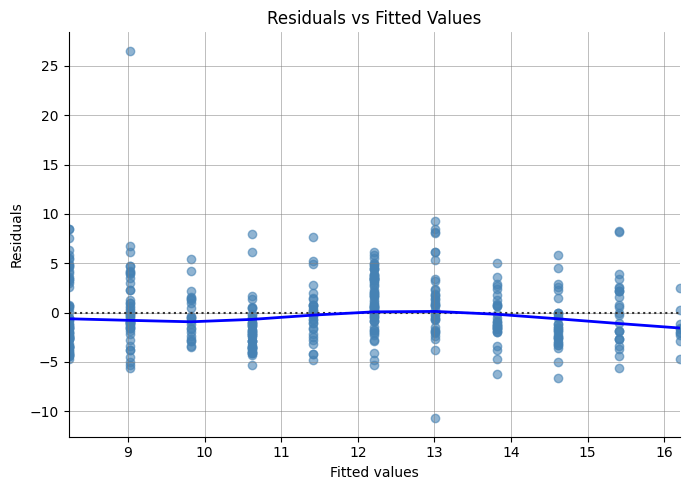

In [42]:
# Create the residuals versus fitted values plot using the fitted model
# This diagnostic plot helps identify non-linearity and heteroscedasticity issues
fig, ax = plt.subplots(figsize=(7, 5))

# Plot residuals (y-axis) against fitted values (x-axis)
sns.residplot(
    x=mdl_price_vs_conv.fittedvalues,  # Model's predicted values
    y=mdl_price_vs_conv.resid,  # Model's residuals (actual - predicted)
    lowess=True,  # Add smoothed trend line
    ax=ax,
    scatter_kws={"color": "steelblue", "alpha": 0.6},  # Style for data points
    line_kws={"color": "blue", "linewidth": 2},  # Style for trend line
)

ax.set(xlabel="Fitted values", ylabel="Residuals", title="Residuals vs Fitted Values")
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

sns.despine()
plt.tight_layout()
plt.show()

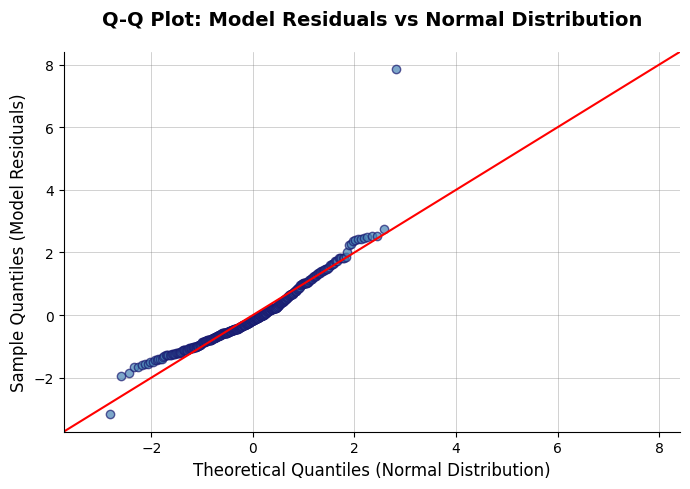

In [43]:
# Create the Q-Q plot of the residuals using object-oriented approach
from statsmodels.api import qqplot

# Create figure and axis objects for better control
fig, ax = plt.subplots(figsize=(7, 5))

# Create the Q-Q plot with enhanced styling
# This plot compares the distribution of model residuals to a normal distribution
# Points that fall along the diagonal line indicate normally distributed residuals
qqplot(
    data=mdl_price_vs_conv.resid,  # Model residuals to test for normality
    fit=True,  # Fit a line through the data
    line="45",  # Use 45-degree reference line (y=x)
    ax=ax,
    markerfacecolor="steelblue",
    markeredgecolor="midnightblue",
    markersize=6,
    alpha=0.7,
)

ax.set_title(
    "Q-Q Plot: Model Residuals vs Normal Distribution",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
ax.set_xlabel("Theoretical Quantiles (Normal Distribution)", fontsize=12)
ax.set_ylabel("Sample Quantiles (Model Residuals)", fontsize=12)

# Light grid helps with visual assessment of deviations from the diagonal
ax.grid(True, alpha=0.5, color="grey", linewidth=0.5)

# Apply seaborn styling for consistency with other plots
sns.despine()

plt.tight_layout()
plt.show()

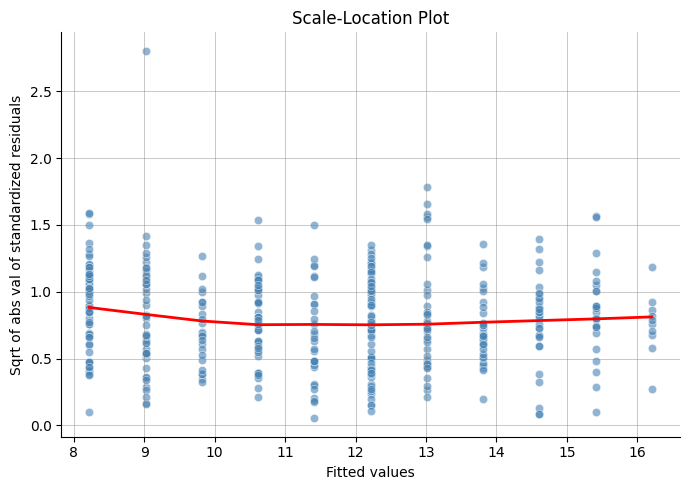

In [44]:
# Create the scale-location plot
fig, ax = plt.subplots(figsize=(7, 5))

# Get standardized residuals and calculate square root of absolute values
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot with fitted values on x-axis
sns.scatterplot(
    x=mdl_price_vs_conv.fittedvalues,
    y=model_norm_residuals_abs_sqrt,
    ax=ax,
    color="steelblue",
    alpha=0.6,
)

# Add a trend line to help identify patterns
sns.regplot(
    x=mdl_price_vs_conv.fittedvalues,
    y=model_norm_residuals_abs_sqrt,
    scatter=False,
    ci=None,
    lowess=True,
    line_kws={"color": "red", "linewidth": 2},
    ax=ax,
)

ax.set(
    xlabel="Fitted values",
    ylabel="Sqrt of abs val of standardized residuals",
    title="Scale-Location Plot",
)

ax.grid(True, alpha=0.6, linewidth=0.5, color="grey")
sns.despine()
plt.tight_layout()
plt.show()

## Defining Outliers, Leverage, and Influence

When building a regression model, not all data points have the same impact. Some observations can disproportionately affect the model's parameters, potentially skewing the results. It is crucial to identify and analyze these points by understanding three related concepts:

  * **Outlier**: An observation with a large **residual**. This means its response (`y`) value is far from the value predicted by the regression line. These are points that lie far above or below the trend line vertically.

  * **Leverage**: A measure of how extreme an observation's explanatory variable (`x`) values are compared to the other observations. A point with high leverage is far from the center of the `x` values (either very small or very large). Such a point acts like a lever, having the *potential* to pull the regression line towards itself.

  * **Influence**: A measure of how much the model's parameters (the slope and intercept) would change if a particular observation were removed from the dataset and the model were refit[cite: 91]. A point is considered influential if its exclusion causes a significant change in the regression line. An influential point is often one that has both high leverage and is an outlier.

### Calculating Leverage and Influence in `statsmodels`

The `statsmodels` library provides a powerful suite of tools for calculating these diagnostic metrics. The primary entry point is the `.get_influence()` method, which is called on a fitted model object.

This influence object has a `.summary_frame()` method that returns a pandas DataFrame containing numerous diagnostic measures for each observation.

  * **Leverage**: This is extracted from the `"hat_diag"` column of the summary frame. It is named after the "hat matrix" in linear algebra, which is used to calculate the fitted values.

  * **Influence (Cook's Distance)**: The most common measure of influence is **Cook's distance**. It considers both the leverage and the residual of each point to quantify its impact on the model. Cook's distance is available in the `"cooks_d"` column of the summary frame.


```python
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Create a generic, reproducible dataset with a high-leverage, influential point
np.random.seed(42)
X = np.linspace(20, 30, 50)
y = 10 + 5 * X + np.random.normal(0, 10, 50)
df = pd.DataFrame({'x_feature': X, 'y_target': y})
# Add a high-leverage, high-influence outlier
influential_point = pd.DataFrame({'x_feature': [5], 'y_target': [150]})
df = pd.concat([df, influential_point], ignore_index=True)

# Fit the model
mdl = smf.ols("y_target ~ x_feature", data=df).fit()

# Get the influence summary frame
influence_summary = mdl.get_influence().summary_frame()

# Add leverage and Cook's distance to the original DataFrame
df['leverage'] = influence_summary['hat_diag']
df['cooks_dist'] = influence_summary['cooks_d']
```

### Identifying and Analyzing Influential Points

After calculating these metrics, the next step is to identify which points are the most influential. This is typically done by sorting the DataFrame by Cook's distance in descending order.

A common rule of thumb is to investigate points with a Cook's distance greater than $4/n$ (where `n` is the number of observations), although often the most influential points will stand out with much larger values.

```python
# Sort the DataFrame by Cook's distance to find the most influential points
df_sorted_by_influence = df.sort_values('cooks_dist', ascending=False)

print(df_sorted_by_influence.head())
```

The output clearly identifies our manually added point as having by far the highest leverage and Cook's distance, confirming it is highly influential.

### The Impact of Influential Points

The most effective way to understand the impact of an influential point is to remove it, refit the model, and compare the new regression line to the original one. This visual comparison immediately reveals how much that single point was skewing the results.

```python
# Identify the index of the most influential point
most_influential_index = df_sorted_by_influence.index[0]

# Create a new DataFrame without this point
df_no_influence = df.drop(most_influential_index)

# Refit the model on the data without the influential point
mdl_no_influence = smf.ols("y_target ~ x_feature", data=df_no_influence).fit()

# Visualize the impact using object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original regression line (with the influential point)
sns.regplot(x="x_feature", y="y_target", data=df, ci=None,
      line_kws={"color": "green", "label": "Original Model"}, ax=ax)

# Plot the new regression line (without the influential point)
sns.regplot(x="x_feature", y="y_target", data=df_no_influence, ci=None,
      line_kws={"color": "red", "label": "Model without Influential Point"}, ax=ax)

ax.set_title("Impact of Removing an Influential Point")
ax.legend()
ax.grid(True, linestyle='--')
plt.tight_layout()
plt.show()
```

The plot clearly shows that the original model (green line) was heavily pulled by the influential point. The new model (red line) provides a much more representative fit for the bulk of the data. The decision to permanently remove such a point requires careful consideration; it could be a data entry error that should be corrected or removed, or it could be a genuinely unique and important observation that warrants further investigation.

In [45]:
# Get the summary frame from mdl_price_vs_dist and save as summary_info.
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column of summary_info to taiwan_real_estate as the leverage column.
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column from summary_info to taiwan_real_estate as the cooks_dist column.
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

## The Problem: Applying Linear Regression to a Binary Response

Consider a scenario where we want to predict a binary outcome, such as whether a customer has churned (`1`) or not (`0`), based on a continuous explanatory variable like their recent activity. While it's possible to fit a linear regression model to this data, the results are fundamentally flawed.

Linear regression is designed to fit a straight line through data, and this line is unbounded—it will extend to positive and negative infinity. When the response variable is strictly bounded between 0 and 1, the linear model will produce nonsensical predictions for explanatory values that are sufficiently high or low.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset that mimics a churn scenario
np.random.seed(42)
df = pd.DataFrame({'explanatory_var': np.linspace(-10, 10, 200)})
# Generate a binary response based on the explanatory variable
probability = 1 / (1 + np.exp(-df['explanatory_var'] * 0.5))
df['response_binary'] = np.random.binomial(1, probability)

# Fit an INCORRECT linear model (OLS) to this binary data
mdl_linear = smf.ols("response_binary ~ explanatory_var", data=df).fit()

# Create figure and axis objects for better control
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter points for the binary response data
sns.scatterplot(x='explanatory_var', y='response_binary', data=df, alpha=0.5, ax=ax)

# Get intercept and slope from the linear model to plot the line
intercept, slope = mdl_linear.params
ax.axline(xy1=(0, intercept), slope=slope, color="red", 
          linestyle="--", label="Incorrect Linear Model")

# Set axis limits to clearly show the problem
ax.set_ylim(-0.2, 1.2)

# Add labels and title
ax.set_title("The Failure of Linear Regression for a Binary Response", fontsize=14)
ax.set_xlabel("Explanatory Variable", fontsize=12)
ax.set_ylabel("Response (0 or 1)", fontsize=12)

# Add legend and grid
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Apply consistent styling
sns.despine()
plt.tight_layout()
plt.show()
```

The plot clearly illustrates the problem. For low values of the explanatory variable, the model predicts "probabilities" less than zero. For high values, it predicts "probabilities" greater than one. These predictions are mathematically and logically impossible.

### The Solution: Logistic Regression

Logistic regression is a type of **Generalized Linear Model (GLM)** specifically designed for a categorical response. Instead of modeling the response `y` directly, logistic regression models the **probability** that the response belongs to a particular class, typically denoted as $P(y=1)$.

To achieve this, it uses the **logistic function**, also known as the **sigmoid function**. This function takes any real-valued number and maps it to a value between 0 and 1.

$$P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$$

No matter what value the linear component $(\beta\_0 + \beta\_1x)$ produces, the logistic function will always constrain the output to the valid probability range of [0, 1]. This results in a characteristic **S-shaped curve** that is a much more natural and accurate fit for binary data.


### Implementation and Visualization in Python

`statsmodels` provides the `logit()` function to fit logistic regression models. The syntax is identical to `ols()`. The most powerful way to understand the result is to visualize it. The `seaborn.regplot()` function can plot a logistic curve directly by setting the `logistic=True` argument.

Let's fit the correct model and compare its fit to the incorrect linear one.

```python
# Fit the CORRECT logistic model
mdl_logistic = smf.logit("response_binary ~ explanatory_var", data=df).fit()

# Visualize and compare both models using object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the logistic regression curve
sns.regplot(x='explanatory_var', y='response_binary', data=df,
            ci=None, logistic=True, line_kws={'label': 'Correct Logistic Model'}, ax=ax)

# Overlay the incorrect linear model line for comparison
ax.axline(xy1=(0, intercept), slope=slope, color="red", 
          linestyle="--", label="Incorrect Linear Model")

ax.set_ylim(-0.2, 1.2)
ax.set_title("Linear vs. Logistic Regression for a Binary Response")
ax.set_xlabel("Explanatory Variable")
ax.set_ylabel("Probability of Response = 1")
ax.legend()
ax.grid(True, linestyle='--')

plt.tight_layout()
plt.show()
```

The visual comparison is definitive. The logistic model's S-shaped curve correctly models the probability, starting near zero, increasing as the explanatory variable increases, and leveling off near one. It provides a theoretically sound and practically superior fit to the data, demonstrating why logistic regression is the appropriate tool for binary response variables.

In [46]:
churn = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/5857/datasets/848e6bf5245f30e7e5cf0f7cb4bab7636a407c6f/churn.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


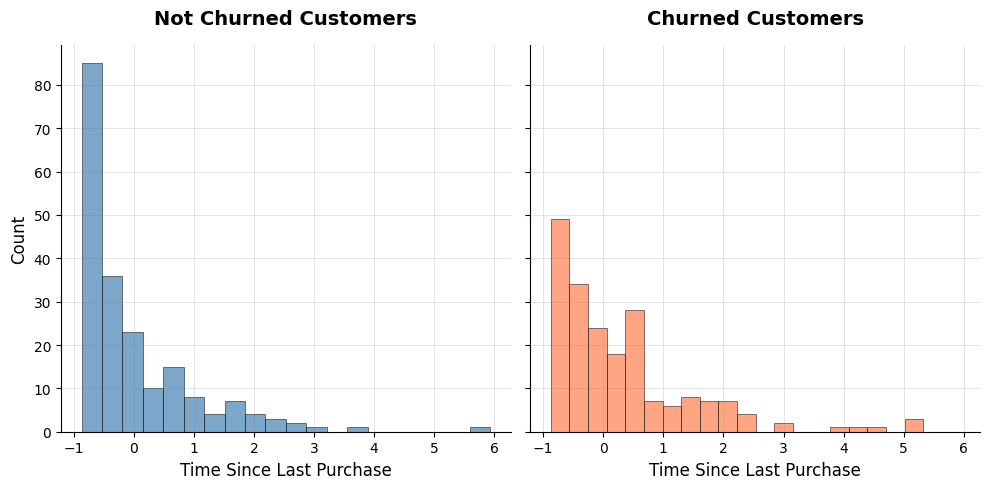

In [47]:
# Create histogram plots split by churn status with custom styling
g = sns.displot(
    data=churn,
    x="time_since_last_purchase",
    col="has_churned",
    bins=20,
    color="steelblue",
)

# Define custom labels and titles
new_labels = ["Not Churned Customers", "Churned Customers"]
colors = ["steelblue", "coral"]

# Customize each subplot
for i, ax in enumerate(g.axes.flat):
    # Set custom titles
    ax.set_title(new_labels[i], fontsize=14, fontweight="bold", pad=15)

    # Set consistent axis labels
    ax.set_xlabel("Time Since Last Purchase", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    # Clear the existing histogram and redraw with custom color
    ax.clear()

    # Filter data for each group and plot with different colors
    subset_data = churn[churn["has_churned"] == i]
    ax.hist(
        subset_data["time_since_last_purchase"],
        bins=20,
        color=colors[i],
        alpha=0.7,
        edgecolor="black",
        linewidth=0.5,
    )

    # Re-apply title and labels after clearing
    ax.set_title(new_labels[i], fontsize=14, fontweight="bold", pad=15)
    ax.set_xlabel("Time Since Last Purchase", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    # Add grid for better readability
    ax.grid(True, alpha=0.3, linewidth=0.5, color="grey")

# Adjust layout and display
plt.tight_layout()
plt.show()

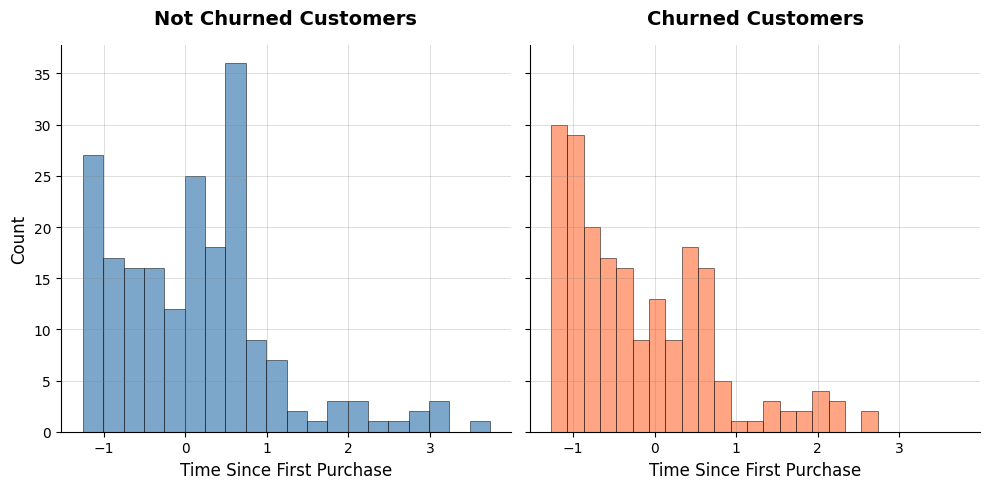

In [48]:
# Redraw the histograms using the time_since_first_purchase column, split for each has_churned value.
g = sns.displot(
    data=churn,
    x="time_since_first_purchase",
    col="has_churned",
    bins=20,
    color="steelblue",
)

new_labels = ["Not Churned Customers", "Churned Customers"]
colors = ["steelblue", "coral"]

for i, ax in enumerate(g.axes.flat):
    # Clear the existing histogram and redraw with custom styling
    ax.clear()

    subset_data = churn[churn["has_churned"] == i]
    ax.hist(
        subset_data["time_since_first_purchase"],
        bins=20,
        color=colors[i],
        alpha=0.7,
        edgecolor="black",
        linewidth=0.5,
    )

    # Add proper titles and labels
    ax.set_title(new_labels[i], fontsize=14, fontweight="bold", pad=15)
    ax.set_xlabel("Time Since First Purchase", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    # Add grid for better readability
    ax.grid(True, alpha=0.3, linewidth=0.6, color="grey")

sns.despine()
plt.tight_layout()
plt.show()

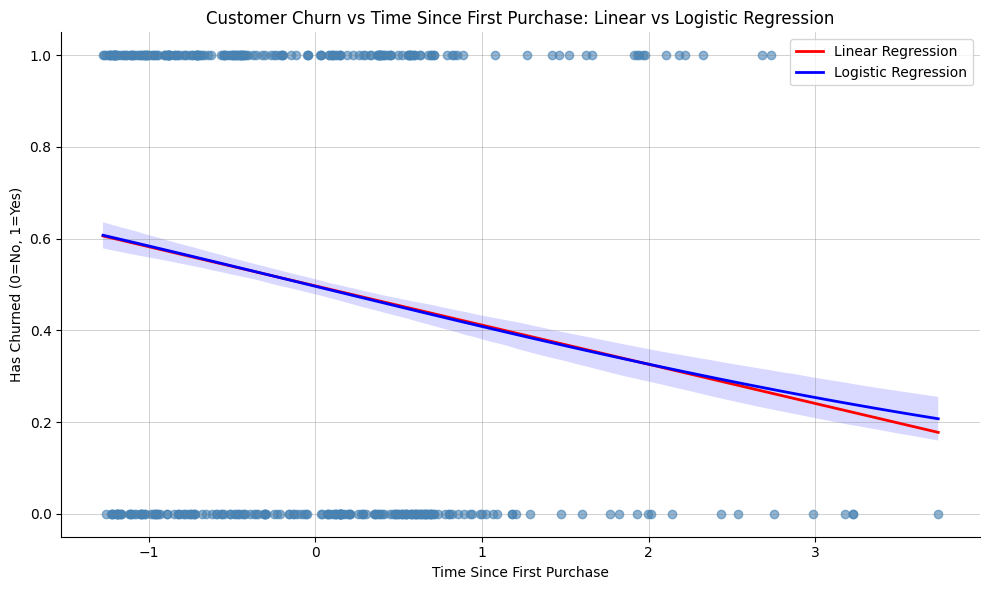

In [49]:
# Using churn, plot has_churned versus time_since_first_purchase as a scatter plot with a red linear regression trend line (without a standard error ribbon).
fig, ax = plt.subplots(figsize=(10, 6))

# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(
    data=churn,
    x="time_since_first_purchase",
    y="has_churned",
    ci=None,
    line_kws={"color": "red", "linewidth": 2},
    scatter_kws={"alpha": 0.6, "color": "steelblue"},
    ax=ax,
    logistic=False,  # Linear regression
)

# Draw a logistic regression trend line on the same plot
sns.regplot(
    data=churn,
    x="time_since_first_purchase",
    y="has_churned",
    ci=50,
    line_kws={"color": "blue", "linewidth": 2},
    scatter=False,  # Don't plot points again
    ax=ax,
    logistic=True,  # Logistic regression
)

ax.set(
    xlabel="Time Since First Purchase", 
    ylabel="Has Churned (0=No, 1=Yes)", 
    title="Customer Churn vs Time Since First Purchase: Linear vs Logistic Regression"
)

# Add legend to distinguish between the two lines
ax.plot([], [], color="red", linewidth=2, label="Linear Regression")
ax.plot([], [], color="blue", linewidth=2, label="Logistic Regression")
ax.legend()

ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
sns.despine()
plt.tight_layout()
plt.show()

### Logistic regression with logit()
Logistic regression requires another function from `statsmodels.formula.api`: `logit()`. It takes the same arguments as `ols()`: a `formula` and `data` argument. You then use `.fit()` to fit the model to the data.

In [50]:
from statsmodels.formula.api import logit 

# Fit a logistic regression of has_churned versus time_since_first_purchase using the churn dataset. Assign to mdl_churn_vs_relationship.
mdl_churn_vs_relationship = logit(formula="has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Predicting Probabilities

The `.predict()` method of a fitted `statsmodels` logistic regression model returns the predicted **probability** of the response variable being the outcome of interest (typically `1`). This prediction is a continuous value between 0 and 1, which represents the model's confidence that the event will occur.

Visually, these predicted probabilities lie on the S-shaped logistic curve.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({'explanatory_var': np.linspace(-5, 5, 200)})
probability = 1 / (1 + np.exp(-df['explanatory_var'] * 0.8))
df['response_binary'] = np.random.binomial(1, probability)

# Fit the logistic model
mdl_logistic = smf.logit("response_binary ~ explanatory_var", data=df).fit(disp=0)

# Create new data on which to make predictions 
explanatory_data = pd.DataFrame({'explanatory_var': np.arange(-5, 5.25, 0.25)})

# Get probability predictions 
prediction_data = explanatory_data.assign(
    probability = mdl_logistic.predict(explanatory_data)
)

# Visualize the predictions on the logistic curve 
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the logistic regression curve using the original data
sns.regplot(data=df, x='explanatory_var', y='response_binary', 
           ax=ax, ci=None, logistic=True, 
           line_kws={'label': 'Logistic Curve'})

# Add predictions as scatter points
sns.scatterplot(data=prediction_data, x='explanatory_var', y='probability',
               ax=ax, color='red', label='Predictions', s=50)

# Customize the plot
ax.set_title('Predicted Probabilities on the Logistic Curve')
ax.set_xlabel("Explanatory Variable")
ax.set_ylabel("Probability of Response = 1")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()
```

### From Probabilities to Outcomes

While probabilities are informative, we often need to make a definitive classification (0 or 1). The standard approach is to use a 0.5 threshold: if the predicted probability is greater than 0.5, the most likely outcome is `1`; otherwise, it is `0`. This can be achieved simply by rounding the probabilities. 

```python
# Convert probabilities to the most likely binary outcome 
prediction_data['most_likely_outcome'] = np.round(prediction_data['probability'])

print(prediction_data.head())
```


### Understanding the Odds Ratio

To better interpret how a change in the explanatory variable affects the outcome, we can convert probabilities to **odds ratios**. The odds ratio is the probability of an event happening divided by the probability of it not happening. 
$$\text{Odds Ratio} = \frac{p}{1-p}$$ 

  * If $p = 0.5$ (50% probability), the odds ratio is 1 (even odds).
  * If $p > 0.5$, the odds ratio is > 1.
  * If $p < 0.5$, the odds ratio is < 1.


```python
# Calculate the odds ratio from the probabilities 
prediction_data['odds_ratio'] = prediction_data['probability'] / (1 - prediction_data['probability'])

# Visualize the odds ratio 
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=prediction_data, x='explanatory_var', y='odds_ratio', ax=ax)
ax.axhline(y=1, color='grey', linestyle='--', label='Even Odds (p=0.5)')
ax.set_title('Odds Ratio vs. Explanatory Variable')
ax.set_xlabel("Explanatory Variable")
ax.set_ylabel("Odds Ratio")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()
```

The relationship between the explanatory variable and the odds ratio is exponential, not linear.

### The Log Odds Ratio: Restoring Linearity

The key insight of logistic regression is that while the relationship with probability is non-linear, the relationship with the **log odds ratio** (also called the **logit**) is **linear**. The log odds are simply the natural logarithm of the odds ratio.

$$\text{Log Odds} = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x$$

This linear relationship is why logistic regression is a type of "Generalized Linear Model." The coefficients (`.params`) of a fitted `logit` model are expressed on this log-odds scale.

```python
# Calculate the log odds ratio 
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(prediction_data['explanatory_var'], prediction_data['log_odds_ratio'])
ax.axhline(y=0, color='grey', linestyle='--', label='Even Odds (Odds Ratio = 1)')
ax.set_title('Log Odds Ratio vs. Explanatory Variable')
ax.set_xlabel("Explanatory Variable")
ax.set_ylabel("Log Odds Ratio")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()
```

The plot confirms that the relationship between the explanatory variable and the log odds is a perfect straight line. The slope of this line is the coefficient for `explanatory_var` from our fitted model.

### Comparing the Prediction Scales

Each of these four scales provides a different way to interpret the model's output, with distinct trade-offs. [cite: 323]

| Scale | Interpretation Ease (Value) | Interpretation Ease (Change) | Precision |
| :--- | :--- | :--- | :--- |
| **Probability** | **Excellent**: Value from 0 to 1 is intuitive. | **Poor**: A one-unit change in `x` has a non-constant effect on probability. | Excellent |
| **Most Likely Outcome** | **Excellent**: A simple binary decision (0 or 1). | **Poor**: Loses all information about uncertainty. | Poor |
| **Odds Ratio** | **Fair**: "Twice as likely" is understandable, but the scale is non-linear. | **Fair**: Changes are multiplicative, which can be hard to interpret. | Excellent |
| **Log Odds Ratio** | **Poor**: The raw value is not intuitive. | **Excellent**: A one-unit change in `x` has a constant, additive effect on the log odds. | Excellent |

### Probabilities
There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

In [51]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                400 non-null    int64  
 1   time_since_first_purchase  400 non-null    float64
 2   time_since_last_purchase   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [52]:
# mdl_churn_vs_relationship is the fitted logistic regression model of has_churned versus time_since_first_purchase.
mdl_churn_vs_relationship = logit(
    formula="has_churned ~ time_since_first_purchase", data=churn
).fit()

# explanatory_data is a DataFrame of explanatory values.
explanatory_data = pd.DataFrame({"time_since_first_purchase": np.arange(-1, 6.25, 0.25)})

# Create a DataFrame, prediction_data, by assigning a column has_churned to explanatory_data.
prediction_data = explanatory_data.assign(has_churned = mdl_churn_vs_relationship.predict(explanatory_data))

# Print the first five lines of the prediction DataFrame.
display(prediction_data.head())

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4


,time_since_first_purchase,has_churned
0,-1.00,0.584096
1,-0.75,0.562401
2,-0.50,0.540465
3,-0.25,0.518370
4,0.00,0.496204


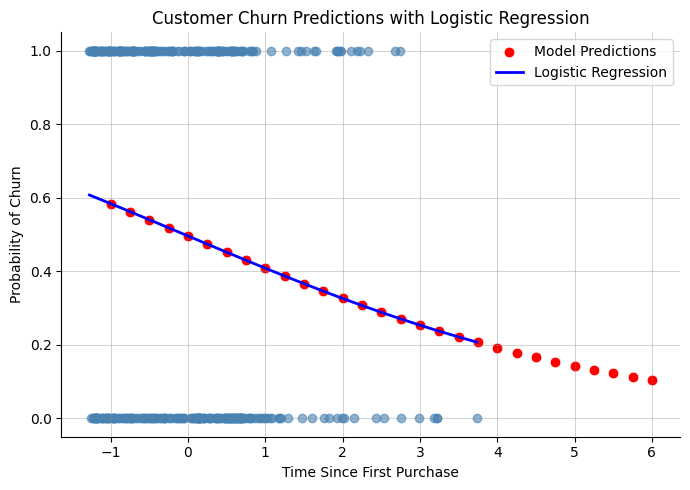

In [53]:
# Create a scatter plot with a logistic trend line of has_churned versus time_since_first_purchase.
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the original data with logistic regression line
sns.regplot(
    x="time_since_first_purchase", 
    y="has_churned", 
    data=churn, 
    ci=None, 
    logistic=True,
    scatter_kws={"alpha": 0.6, "color": "steelblue"},
    line_kws={"color": "blue", "linewidth": 2},
    ax=ax
)

# Overlay the predictions as red points
sns.scatterplot(
    x="time_since_first_purchase", 
    y="has_churned", 
    data=prediction_data, 
    color="red", 
    s=60,
    label="Model Predictions",
    ax=ax
)

# Add legend manually for the logistic line
ax.plot([], [], color="blue", linewidth=2, label="Logistic Regression")

ax.set(
    xlabel="Time Since First Purchase", 
    ylabel="Probability of Churn", 
    title="Customer Churn Predictions with Logistic Regression"
)

ax.legend()
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
sns.despine()
plt.tight_layout()
plt.show()

### Most likely outcome
When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

In [54]:
# Update prediction_data to add a column of the most likely churn outcome, most_likely_outcome.
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the first five lines of prediction_data.
display(prediction_data.head())

,time_since_first_purchase,has_churned,most_likely_outcome
0,-1.00,0.584096,1.0
1,-0.75,0.562401,1.0
2,-0.50,0.540465,1.0
3,-0.25,0.518370,1.0
4,0.00,0.496204,0.0


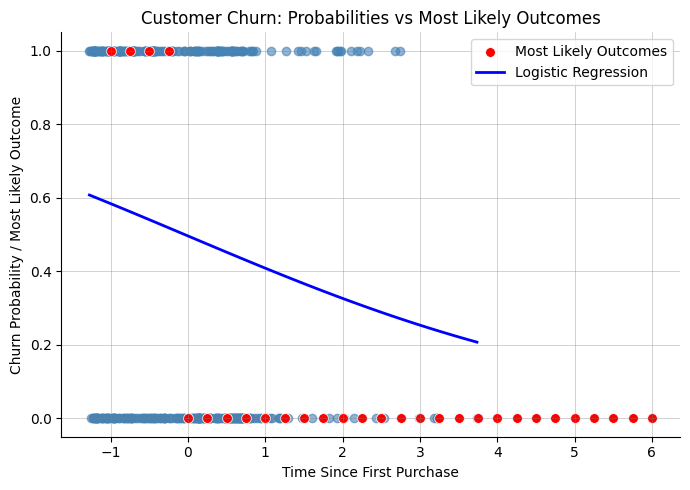

In [55]:
# Create a scatter plot with logistic trend line (from previous exercise)
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the original data with logistic regression line
sns.regplot(
    x="time_since_first_purchase",
    y="has_churned",
    data=churn,
    ci=None,
    logistic=True,
    scatter_kws={"alpha": 0.6, "color": "steelblue"},
    line_kws={"color": "blue", "linewidth": 2},
    ax=ax,
)

# Overlay the plot with prediction_data with red data points, with most_likely_outcome on the y-axis.
sns.scatterplot(
    x="time_since_first_purchase",
    y="most_likely_outcome",
    data=prediction_data,
    color="red",
    s=50,
    label="Most Likely Outcomes",
    ax=ax,
)

# Add legend manually for the logistic line
ax.plot([], [], color="blue", linewidth=2, label="Logistic Regression")

ax.set(
    xlabel="Time Since First Purchase",
    ylabel="Churn Probability / Most Likely Outcome",  # Updated to reflect both scales
    title="Customer Churn: Probabilities vs Most Likely Outcomes",  # More descriptive title
)

ax.legend()
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
sns.despine()
plt.tight_layout()
plt.show()

### Odds ratio
Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

In [56]:
# Update prediction_data to add a column, odds_ratio, of the odds ratios.
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (
    1 - prediction_data["has_churned"]
)

# Print the first five lines of prediction_data.
display(prediction_data.head())

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio
0,-1.00,0.584096,1.0,1.404400
1,-0.75,0.562401,1.0,1.285197
2,-0.50,0.540465,1.0,1.176111
3,-0.25,0.518370,1.0,1.076284
4,0.00,0.496204,0.0,0.984930


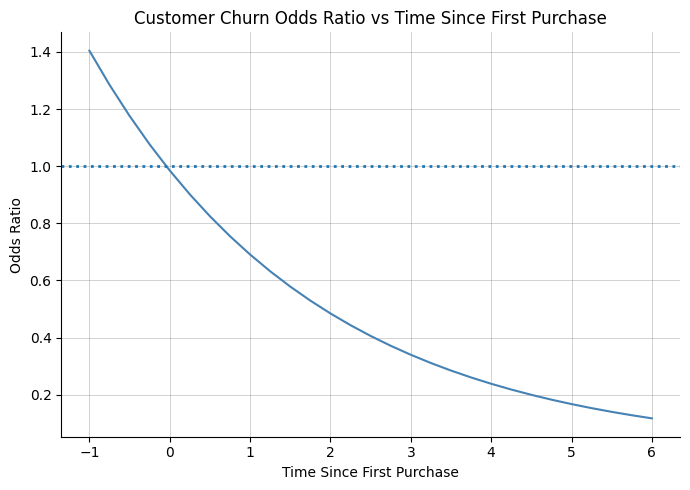

In [57]:
# Using prediction_data, draw a line plot of odds_ratio versus time_since_first_purchase.
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(x="time_since_first_purchase", y="odds_ratio", data=prediction_data, ax=ax, color="steelblue")

# Add a dotted horizontal line at odds_ratio = 1
ax.axhline(y=1, linestyle="dotted", linewidth=2)
sns.despine()

ax.set(
    xlabel="Time Since First Purchase", 
    ylabel="Odds Ratio", 
    title="Customer Churn Odds Ratio vs Time Since First Purchase"
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
plt.tight_layout()
plt.show()

### Log odds ratio
One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

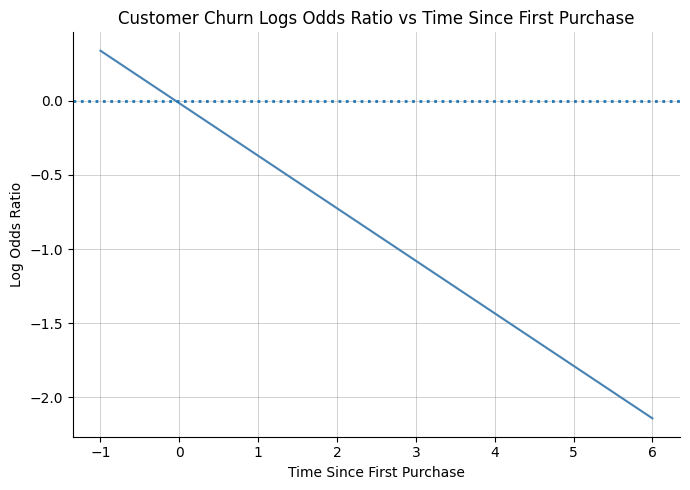

In [58]:
# Update prediction_data to add a log_odds_ratio column derived from odds_ratio.
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(
    x="time_since_first_purchase",
    y="log_odds_ratio",
    data=prediction_data,
    ax=ax,
    color="steelblue",
)

# Add a dotted horizontal line at odds_ratio = 1
ax.axhline(y=0, linestyle="dotted", linewidth=2)
sns.despine()

ax.set(
    xlabel="Time Since First Purchase",
    ylabel="Log Odds Ratio",
    title="Customer Churn Logs Odds Ratio vs Time Since First Purchase",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
plt.tight_layout()
plt.show()

## The Confusion Matrix: Anatomy of a Classification Model's Performance

Unlike linear regression, which uses metrics like R-squared, the performance of a classification model is evaluated by how well it assigns observations to the correct categories. The **confusion matrix** is a table that provides a complete picture of a model's performance by cross-tabulating the actual outcomes with the predicted outcomes.

For a binary classification problem (with outcomes 0 and 1, or False and True), there are four possible results for any prediction:

  * **True Negative (TN)**: The model correctly predicted `0` when the actual outcome was `0`.
  * **True Positive (TP)**: The model correctly predicted `1` when the actual outcome was `1`.
  * **False Positive (FP)**: The model incorrectly predicted `1` when the actual outcome was `0`. This is also known as a **Type I error**.
  * **False Negative (FN)**: The model incorrectly predicted `0` when the actual outcome was `1`. This is also known as a **Type II error**.

These four outcomes can be organized into a 2x2 matrix:

| | Predicted Negative (0) | Predicted Positive (1) |
| :--- | :--- | :--- |
| **Actual Negative (0)**| True Negative (TN) | False Positive (FP) |
| **Actual Positive (1)** | False Negative (FN) | True Positive (TP) |


### Generating a Confusion Matrix in `statsmodels`

To generate a confusion matrix, you first need the model's binary predictions. This is typically done by taking the predicted probabilities from `model.predict()` and rounding them to the nearest integer (0 or 1).

`statsmodels` provides a convenient method called `.pred_table()` on a fitted logistic regression results object that directly computes the confusion matrix and returns it as a NumPy array.

```python
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({'feature': np.linspace(-5, 5, 200)})
probability = 1 / (1 + np.exp(-df['feature'] * 0.8))
df['response'] = np.random.binomial(1, probability)

# Fit the logistic model
mdl_logistic = smf.logit("response ~ feature", data=df).fit(disp=0)

# Generate the confusion matrix using the .pred_table() method
conf_matrix = mdl_logistic.pred_table()

print(conf_matrix)

# The elements correspond to:
# [[TN, FP],
#  [FN, TP]]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print(f"\nTrue Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")
```

### Key Performance Metrics Derived from the Confusion Matrix

From the four values in the confusion matrix, we can calculate several key metrics to quantify the model's fit in different ways.

### Accuracy

**Accuracy** is the most intuitive metric. It measures the proportion of all predictions that were correct.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

  * **Interpretation**: Provides a single, overall measure of the model's performance. However, accuracy can be misleading, especially on **imbalanced datasets** where one class is much more frequent than the other.


```python
# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.4f}")
```

### Sensitivity (Recall or True Positive Rate)

**Sensitivity** measures the proportion of *actual positives* that were correctly identified by the model. It answers the question: "Of all the actual positive cases, how many did the model correctly find?"

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

  * **Interpretation**: This is a critical metric when the cost of a **false negative** is high. For example, in a medical test for a disease, high sensitivity is crucial to ensure that you identify as many people with the disease as possible.


```python
# Calculate Sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {sensitivity:.4f}")
```

### Specificity (True Negative Rate)

**Specificity** measures the proportion of *actual negatives* that were correctly identified by the model. It answers the question: "Of all the actual negative cases, how many did the model correctly dismiss?"

$$\text{Specificity} = \frac{TN}{TN + FP}$$

  * **Interpretation**: This is important when the cost of a **false positive** is high. For example, in a spam filter, high specificity is needed to avoid misclassifying important emails as spam.

```python
# Calculate Specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")
```

No single metric tells the whole story. A thorough model evaluation requires looking at the confusion matrix and considering metrics like sensitivity and specificity in the context of the specific problem you are trying to solve.

In [62]:
prediction_data.head()


,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-1.00,0.584096,1.0,1.404400,0.339610
1,-0.75,0.562401,1.0,1.285197,0.250912
2,-0.50,0.540465,1.0,1.176111,0.162213
3,-0.25,0.518370,1.0,1.076284,0.073514
4,0.00,0.496204,0.0,0.984930,-0.015185


In [68]:
# Get the actual responses by subsetting the has_churned column of the dataset. Assign to actual_response.
actual_response = churn["has_churned"]

# Get the "most likely" predicted responses from the model. Assign to predicted_response.
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create a DataFrame from actual_response and predicted_response. Assign to outcomes.
outcomes = pd.DataFrame(
    {"actual_response": actual_response, "predicted_response": predicted_response}
)

# Print the outcomes
print(outcomes.value_counts(sort=False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
Name: count, dtype: int64


### Drawing a mosaic plot of the confusion matrix
While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the `.pred_table()` method can calculate the confusion matrix for you.

Additionally, you can use the output from the `.pred_table()` method to visualize the confusion matrix, using the `mosaic()` function.

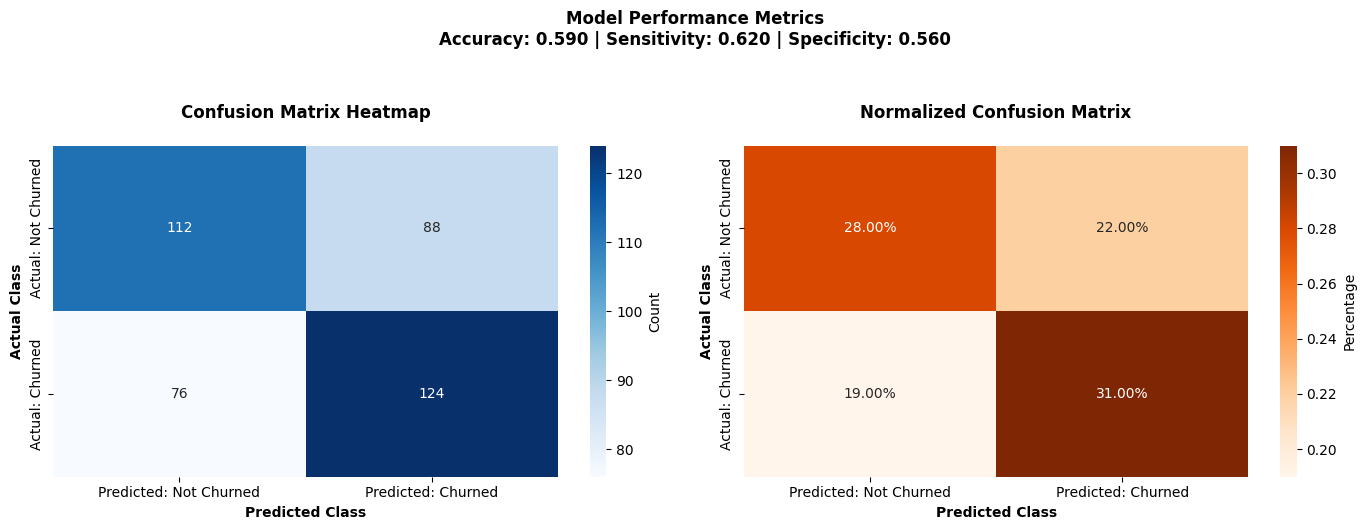

In [ ]:
# Import the mosaic() function from statsmodels.graphics.mosaicplot.
from statsmodels.graphics.mosaicplot import mosaic 
# Create conf_matrix using the .pred_table() method and print it.
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Draw a mosaic plot of conf_matrix
# The confusion matrix shows the relationship between actual and predicted classifications

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Convert the confusion matrix to a DataFrame with descriptive labels
# This makes the matrix more interpretable by clearly labeling what each cell represents
conf_df = pd.DataFrame(conf_matrix, 
                      index=['Actual: Not Churned', 'Actual: Churned'],
                      columns=['Predicted: Not Churned', 'Predicted: Churned'])

# First visualization: Raw count heatmap
# Shows the absolute number of observations in each category
# Darker colors indicate higher counts, making patterns easier to spot
sns.heatmap(conf_df, annot=True, fmt='g', cmap='Blues', 
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix Heatmap', fontweight='bold', pad=20)
ax1.set_xlabel('Predicted Class', fontweight='bold')
ax1.set_ylabel('Actual Class', fontweight='bold')

# Second visualization: Normalized confusion matrix (percentages)
# Shows the proportion of total observations in each cell
# This normalization helps compare performance across different dataset sizes
conf_matrix_norm = conf_matrix / conf_matrix.sum()
conf_df_norm = pd.DataFrame(conf_matrix_norm,
                           index=['Actual: Not Churned', 'Actual: Churned'],
                           columns=['Predicted: Not Churned', 'Predicted: Churned'])

sns.heatmap(conf_df_norm, annot=True, fmt='.2%', cmap='Oranges',
            ax=ax2, cbar_kws={'label': 'Percentage'})
ax2.set_title('Normalized Confusion Matrix', fontweight='bold', pad=20)
ax2.set_xlabel('Predicted Class', fontweight='bold')
ax2.set_ylabel('Actual Class', fontweight='bold')

# Calculate key performance metrics from the confusion matrix components
# These metrics provide different perspectives on model performance
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)      # Overall correctness
sensitivity = TP / (TP + FN)                     # True positive rate (recall)
specificity = TN / (TN + FP)                     # True negative rate

# Display the calculated metrics as a summary above the plots
# This provides immediate insight into model performance without manual calculation
metrics_text = f'Accuracy: {accuracy:.3f} | Sensitivity: {sensitivity:.3f} | Specificity: {specificity:.3f}'
fig.suptitle(f'Model Performance Metrics\n{metrics_text}', 
             fontsize=12, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()